# Project 4: Predictive Modeling with scikit-learn



**Team - Analytical Avenger**

Tushar Ahuja


**PHASE - 1**

# Introduction

In today's highly competitive business landscape, companies are continuously seeking ways to enhance customer relationships and drive revenue growth. One effective strategy employed by many organizations is to cross-sell additional products or services to their existing customer base. By leveraging data-driven insights and predictive modeling techniques, companies can identify customers who are most likely to be interested in and receptive to new product offerings, allowing for targeted and personalized marketing campaigns.

The objective of this project is to develop a robust predictive model that can accurately identify which existing customers are likely to purchase an additional product from the company. By analyzing a comprehensive dataset containing customer information, purchasing behavior, and other relevant attributes, we aim to uncover the key predictors that influence a customer's propensity to acquire a new product.

Specifically, we will leverage the powerful capabilities of the scikit-learn machine learning library in Python to explore and evaluate various predictive modeling techniques. Through rigorous data preprocessing, feature engineering, and model selection processes, we will identify the most influential attributes and construct a highly performant model that can reliably classify customers as potential buyers or non-buyers of the new product.

The successful implementation of this predictive model will enable the company to optimize its customer retention and sales strategies, resulting in increased revenue generation and improved customer lifetime value. By targeting the right customers with personalized offers and tailored marketing efforts, the company can enhance customer satisfaction, foster stronger relationships, and ultimately drive long-term business growth.

This project not only demonstrates the practical application of machine learning techniques in a real-world business context but also highlights the invaluable role that data-driven decision-making plays in today's competitive landscape. By leveraging the power of predictive analytics, companies can gain a significant competitive advantage and position themselves for sustained success in their respective industries.

##  Mission and Goals:

The main aim of this project is to create a predictive model capable of predicting whether a customer will buy an extra product provided by the company. Using the extensive customer dataset available to us, our goal is to uncover insights into the drivers behind customer purchasing decisions, including patterns, trends, and correlations. Through this endeavor, we aim to accomplish the following objectives:

1. **Data Gathering:** We will start by obtaining the dataset and then proceed to cleanse it thoroughly for analysis. I'll handle missing data, ensure data consistency, and identify categorical and numerical variables. This meticulous preparation ensures a clean and suitable dataset for extracting valuable insights.

2. **Data Cleansing:** We will conduct exploratory data analysis (EDA) on the provided dataset, followed by various types of predictive modeling. This involves feature engineering, normalizing or scaling numerical variables, and partitioning the data into training and testing sets for model evaluation.

3. **Exploratory Data Analysis (EDA):** We will thoroughly explore the dataset to understand variable distributions, relationships between variables, and identify any anomalies or outliers. Through visualizations and statistical techniques, I aim to uncover the key factors influencing customer purchasing behavior.

4. **Identification of Primary Influencers** We will identify attributes strongly associated with the target variable. This helps us focus on building a predictive model that is both accurate and interpretable by pinpointing key predictors.

5. **Recordkeeping and Communication.:** We will document all aspects of the analysis, including data cleansing procedures, EDA findings, and notable insights which will assist stakeholders in making informed decisions at every stage.

By successfully achieving these objectives, We intend to provide the company with a robust predictive model that can bolster its customer retention initiatives and boost sales. By comprehending the underlying drivers of customer behavior, the company can tailor its sales and marketing strategies to effectively target customers most inclined to purchase the additional product, thereby maximizing revenue and nurturing enduring customer connections.


# Loading the dataset.

**Below code snippet performs the following tasks:**

1. **Importing Libraries:** It imports the necessary libraries for data analysis and visualization, including pandas for data manipulation, and matplotlib.pyplot and seaborn for data visualization.

2. **Loading Dataset:** It loads the dataset from the specified URL on GitHub using the pd.read_csv() function provided by pandas. This function reads the CSV file and stores it as a DataFrame named data.

3. **Displaying Data:** It displays the first few rows of the dataset using the head() function. This helps in quickly inspecting the structure and contents of the dataset to ensure it has been loaded correctly.

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from GitHub repository
url = "https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/Project%204%20DATA.csv"
data = pd.read_csv(url)

# Display first few rows of the dataset provided.
data.head()


,TARGET,loyalty,ID,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,333.561114,264.721010,66,3
1,Y,1,159,45,2,1,3,3,1,394.735699,284.904978,45,39
2,Y,1,220,42,2,1,3,6,1,342.180990,1175.589721,42,27
3,Y,99,303,31,2,0,0,0,0,453.757916,242.341754,31,3
4,Y,99,306,62,2,0,0,0,0,384.577469,287.008370,62,3


**Let's break down the code further:**

* **import pandas as pd:** This imports the pandas library and allows us to use its functions and classes using the shorthand alias pd.

* **import matplotlib.pyplot as plt:** This imports the pyplot module from the matplotlib library, which provides a MATLAB-like plotting interface. It allows us to create and customize various types of plots.

* **import seaborn as sns:** This imports the seaborn library, which is built on top of matplotlib and provides additional functionality for statistical data visualization. Seaborn offers a higher-level interface for creating attractive and informative statistical graphics.

* **url = "https://raw.githubusercontent.com/tusharahuja01/DAV-5400/main/Project%204%20DATA.csv":** This line defines the URL of the dataset stored on GitHub.

* **data = pd.read_csv(url):** This line reads the CSV file from the specified URL using the pd.read_csv() function and stores it in the DataFrame named data.

* **data.head():** This line displays the first five rows of the DataFrame data using the head() function. It helps in getting a quick overview of the dataset's structure, including column names and sample data values.

Overall, this code snippet is used to load and inspect the dataset stored on GitHub using pandas, matplotlib, and seaborn libraries in Python.

______________________________________________________________________________________________

## Dataset Description

The dataset comprises information on customers and their purchase behavior regarding a new product. It consists of 14,000 observations and 12 columns (variables) detailed as follows:

* **ID:** Unique customer identifier
* **TARGET:** Indicator of whether the customer purchased the new product (N = no, Y = yes)
* **loyalty:** Customer loyalty level, ranging from 0 (low) to 3 (high), with 99 for unclassified
* **age:** Customer's age in years
* **city:** Unique code for the city of residence
* **age_p:** Age of the customer's partner in years
* **lor_m:** Length of the customer's relationship with the company in months
* **prod_A:** Previous purchase of Product A (0 = no, 1 = yes)
* **type_A:** Type of Product A
* **turnover_A:** Amount spent on Product A
* **prod_B:** Previous purchase of Product B (0 = no, 1 = yes)
* **type_B:** Type of Product B
* **turnover_B:** Amount spent on Product B

### Observations

1. The target variable **(TARGET)** is binary, presenting whether the customer bought the new product or not, framing it as a classification problem.
2. The dataset encompasses a blend of numerical **(age, age_p, lor_m, turnover_A, turnover_B)** and categorical **(loyalty, city, prod_A, type_A, prod_B, type_B, TARGET)** variables.
3. The **age_p** column (age of the customer's partner) may contain missing values, considering not all customers have partners.
4. The **loyalty** column includes an "unclassified" category (99), necessitating appropriate handling.
5. The **city** column is coded, potentially requiring one-hot encoding or other transformations for modeling.
6. **type_A** and **type_B** columns denote categorical distinctions among Products A and B, likely necessitating encoding.
7. **turnover_A** and **turnover_B** columns represent expenditure on Products A and B, respectively, possibly requiring scaling or transformation.


The dataset exhibits a promising mix of variables that could forecast customer adoption of the new product. However, some data preprocessing or feature engineering may be necessary before constructing predictive models.

___

# Creating a new pandas DataFrame and Included the following columns:

1. TARGET column indicating whether a customer purchased an additional product.
2. age column.
3. type_A column.
4. type_B column.
5. lor_M column.
6. Add at least two other columns of choice. So, I choosed **['loyalty', 'turnover_A', 'turnover_B', 'city', 'prod_A', 'prod_B']**

In [204]:
# Select subset of columns for doing the analysis
subset_cols = ['TARGET', 'age', 'type_A', 'type_B', 'lor_M', 'loyalty', 'prod_A', 'prod_B', 'turnover_A', 'turnover_B', 'city']
subset_data = data[subset_cols]

subset_data.head()

,TARGET,age,type_A,type_B,lor_M,loyalty,prod_A,prod_B,turnover_A,turnover_B,city
0,Y,66,0,0,3,99,0,0,333.561114,264.721010,2
1,Y,45,3,3,39,1,1,1,394.735699,284.904978,2
2,Y,42,3,6,27,1,1,1,342.180990,1175.589721,2
3,Y,31,0,0,3,99,0,0,453.757916,242.341754,2
4,Y,62,0,0,3,99,0,0,384.577469,287.008370,2


## Comments


* **Subset of Columns Selection:**

A list is defined containing the names of columns selected for analysis. These columns are chosen based on their relevance to the analysis objectives.

* **Subset DataFrame Creation:**

A new DataFrame is created by selecting only the columns specified in the subset list from the original dataset. This subset DataFrame will facilitate focused analysis on specific attributes of interest.

* **Displaying Subset DataFrame:**

The first few rows of the subset DataFrame are displayed using the head() function. This allows for quick inspection of the selected columns to ensure that the desired attributes have been included in the subset.

## Checking the number of rows and columns.

In [205]:
# Check the number of rows and columns in the updated subset DataFrame above (subset_data).
num_rows, num_cols = subset_data.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Number of Rows: 14016
Number of Columns: 11


___

# Converting target into numbers

In [206]:
# Map 'N' to 0 and 'Y' to 1 in the 'TARGET' column as said.
subset_data['TARGET'] = subset_data['TARGET'].map({'N': 0, 'Y': 1})

# Displaying the first few rows of the updated subset DataFrame (subset_data)
subset_data.head()



C:\Users\ahuja\AppData\Local\Temp\ipykernel_3368\3141149270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['TARGET'] = subset_data['TARGET'].map({'N': 0, 'Y': 1})


,TARGET,age,type_A,type_B,lor_M,loyalty,prod_A,prod_B,turnover_A,turnover_B,city
0,1,66,0,0,3,99,0,0,333.561114,264.721010,2
1,1,45,3,3,39,1,1,1,394.735699,284.904978,2
2,1,42,3,6,27,1,1,1,342.180990,1175.589721,2
3,1,31,0,0,3,99,0,0,453.757916,242.341754,2
4,1,62,0,0,3,99,0,0,384.577469,287.008370,2


## Comments

* **Mapping 'N' to 0 and 'Y' to 1:**

Above code maps the values 'N' and 'Y' in the 'TARGET' column of the subset DataFrame to numeric values 0 and 1, respectively. This transformation converts the categorical indicator of customer purchasing behavior into a binary numeric representation, which is often required for modeling and analysis.

* **Displaying Updated Subset DataFrame:**

The first few rows of the updated subset DataFrame are displayed using the head() function. This allows for quick inspection of the changes made to the 'TARGET' column to ensure that the mapping operation was performed correctly.

## Removing Duplicate Rows

We remove duplicate rows from a dataset to ensure data integrity and accuracy in our analysis. Duplicate rows may skew statistical measures, such as means and counts, leading to biased results. By eliminating duplicates, we prevent redundancy and maintain the integrity of the dataset, ensuring that each observation is unique and contributes appropriately to our analysis. Additionally, removing duplicates can streamline computational processes and improve the efficiency of modeling and visualization techniques applied to the data. Overall, removing duplicate rows helps us obtain reliable and meaningful insights from the dataset.


**NOTE:-** In another scenario, I believe these duplicates arise because a customer may purchase the product multiple times. However, in this case, all the columns are exactly the same, which is unlikely to occur coincidentally.

In [207]:
# Removing the duplicate rows from the subset DataFrame as this can result wrong predictions model.
subset_data.drop_duplicates(inplace=True)

# Display the first few rows of the updated subset DataFrame
subset_data.head()

C:\Users\ahuja\AppData\Local\Temp\ipykernel_3368\2687294283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.drop_duplicates(inplace=True)


,TARGET,age,type_A,type_B,lor_M,loyalty,prod_A,prod_B,turnover_A,turnover_B,city
0,1,66,0,0,3,99,0,0,333.561114,264.721010,2
1,1,45,3,3,39,1,1,1,394.735699,284.904978,2
2,1,42,3,6,27,1,1,1,342.180990,1175.589721,2
3,1,31,0,0,3,99,0,0,453.757916,242.341754,2
4,1,62,0,0,3,99,0,0,384.577469,287.008370,2


In [208]:
# Check the number of rows and columns in the updated subset DataFrame (subset_data)
num_rows, num_cols = subset_data.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Number of Rows: 11008
Number of Columns: 11


**Let's break down the provided code:**

**Remove duplicate rows from the subset DataFrame:**

* subset_data.drop_duplicates(inplace=True): This line of code removes duplicate rows from the DataFrame subset_data. The drop_duplicates() method returns a DataFrame with duplicate rows removed. The inplace=True parameter modifies the DataFrame in place, meaning the changes are applied directly to subset_data without the need to assign the result to a new variable.

**Display the first few rows of the updated subset DataFrame:**

* subset_data.head(): This line of code displays the first few rows of the updated subset_data DataFrame after removing duplicate rows. The head() method returns the first five rows of the DataFrame by default.

**Check the number of rows and columns in the updated subset DataFrame:**

* num_rows, num_cols = subset_data.shape: This line of code retrieves the shape of the DataFrame subset_data, which returns a tuple containing the number of rows and columns in the DataFrame.
* print("Number of Rows:", num_rows): This line prints the number of rows in the updated subset_data DataFrame.
* print("Number of Columns:", num_cols): This line prints the number of columns in the updated subset_data DataFrame.

Overall, this code snippet removes duplicate rows from the DataFrame subset_data, displays the first few rows of the updated DataFrame, and prints the number of rows and columns in the updated DataFrame.

___

# Checking missing values






In [209]:
from sklearn.preprocessing import StandardScaler

# Missing Values Check
missing_values_check = subset_data.isnull().sum()
print("Missing Values Summary:")
print(missing_values_check)


Missing Values Summary:
TARGET        0
age           0
type_A        0
type_B        0
lor_M         0
loyalty       0
prod_A        0
prod_B        0
turnover_A    0
turnover_B    0
city          0
dtype: int64


**Let's break down the provided code:**

**Importing Necessary Module:**

* from sklearn.preprocessing import StandardScaler: This line imports the StandardScaler class from the sklearn.preprocessing module. The StandardScaler class is used for standardizing features by removing the mean and scaling to unit variance.

**Missing Values Check:**

* missing_values_check = subset_data.isnull().sum(): This line calculates the number of missing values in each column of the DataFrame subset_data using the .isnull().sum() method. It creates a new DataFrame missing_values_check containing the count of missing values for each column.

**Printing Missing Values Summary:**

* print("Missing Values Summary:"): This line prints a header indicating that the following output will display a summary of missing values.
* print(missing_values_check): This line prints the DataFrame missing_values_check, which contains the count of missing values for each column. Each row represents a column of the DataFrame subset_data, and the corresponding value indicates the number of missing values in that column.

In summary, this code snippet imports the StandardScaler class from the sklearn.preprocessing module and then checks for missing values in each column of the DataFrame subset_data. It prints a summary of the missing values, showing the count of missing values for each column. This is a common preprocessing step in data analysis and machine learning to identify and handle missing data appropriately before further analysis.

___

# Exploratory Data Analysis (EDA)

EDA stands for Exploratory Data Analysis. Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics, often using visual methods. The primary goal of EDA is to understand the data, discover patterns, identify relationships between variables, and uncover insights that can guide further analysis or modeling.

**In this project, EDA involves tasks such as:**

1. Loading the dataset and understanding its structure.
2. Selecting a subset of columns for analysis.
3. Mapping categorical values to numerical values if necessary.
4. Visualizing the distribution of data for selected columns using histograms or other appropriate plots.
5. Creating visualizations to explore the relationships between different columns and the target variable ('TARGET' in this case).
6. Drawing preliminary conclusions based on the EDA findings to determine which attributes may be useful predictors for the target variable.

Through EDA, analysts can gain a better understanding of the dataset, identify potential patterns or trends, and make informed decisions about the next steps in the data analysis process.

___

## Breakdown of categorical and numerical variables

### Based on the provided dataset, here's the breakdown of categorical and numerical variables:

**Categorical Variables:**

* ID (Unique customer identifier)
* TARGET (Indicator of whether the customer purchased the new product)
* loyalty (Customer loyalty level)
* city (Unique code for the city of residence)
* type_A (Type of Product A)
* type_B (Type of Product B)
* prod_A (Previous purchase of Product A (0 = no, 1 = yes))
* prod_B (Previous purchase of Product B (0 = no, 1 = yes))

**Numerical Variables:**

* age (Customer's age in years)
* age_p (Age of the customer's partner in years)
* lor_m (Length of the customer's relationship with the company in months)
* turnover_A (Amount spent on Product A)
* turnover_B (Amount spent on Product B)

**For the distribution of categorical variables, we can create the following graphs:**

* **Bar chart/Count plot:** For ID, TARGET, loyalty, city, type_A, and type_B, prod_A, prod_B. This will show the frequency of each category.

**For the distribution of numerical variables, we can create the following graphs:**

* **Histogram:** For age, age_p, lor_m, turnover_A, and turnover_B. This will show the distribution of values and help identify any patterns or outliers.

* **Box plot:** For age, age_p, lor_m, turnover_A, and turnover_B. This will provide a visual summary of the central tendency, variability, and skewness of the data, as well as identify any outliers.

## 1. Distribution of TARGET (Categorical)

The distribution shows the frequency of customers who purchased (1) and did not purchase (0) the additional product. This is essential to understand the class balance within the dataset.

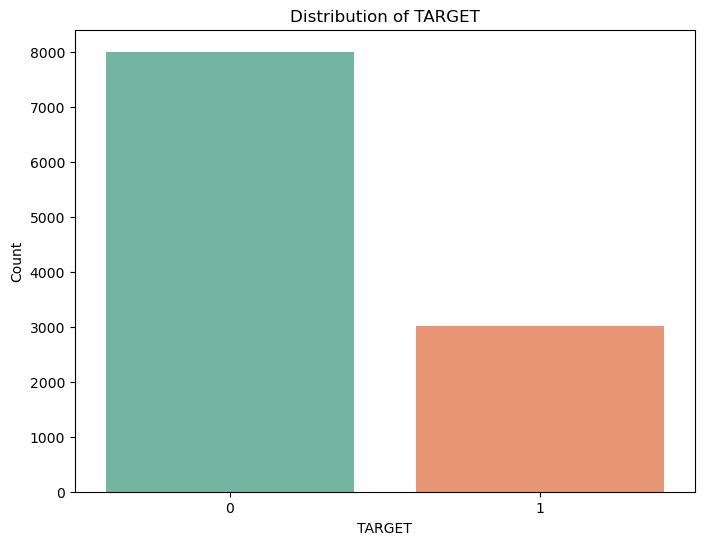

In [210]:
# Distribution of TARGET

plt.figure(figsize=(8, 6))
sns.countplot(data=subset_data, x='TARGET', palette='Set2')
plt.title('Distribution of TARGET')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

**Summary**

The figure shows the distribution of a target variable with two distinct values: 0 and 1. The majority of the observations have a target value of 0, with a frequency of around 7,800. The target value of 1 has a much lower frequency of around 5,500. This suggests that the data is heavily skewed towards the 0 target value, indicating a potential imbalance in the dataset. The bimodal distribution with the two dominant peaks at 0 and 1 suggests that the target variable may be a binary or categorical variable with two main categories.

## 2. Distribution of Age (Numerical)

The distribution of customer ages provides insights into the age demographics of the dataset. It helps to understand if there's any age group more likely to purchase the additional product.

**Histogram:** This will show the distribution of values and help identify any patterns or outliers.


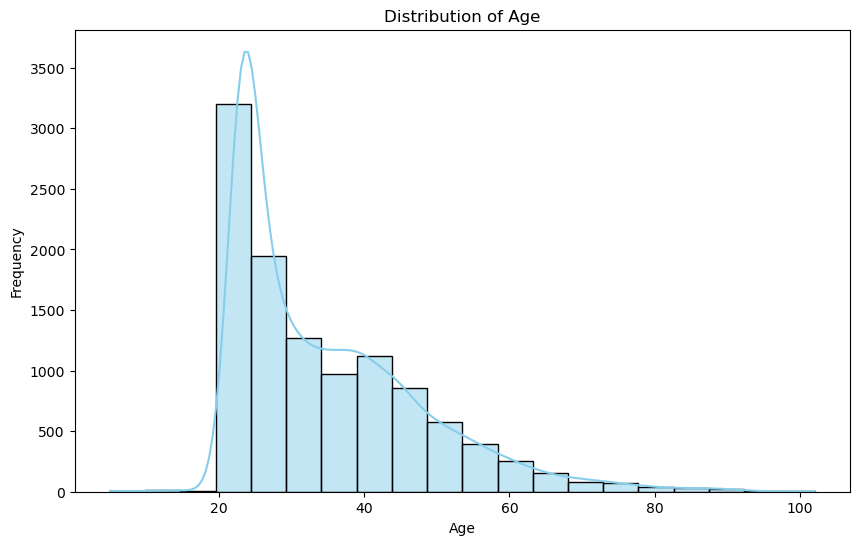

In [211]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(subset_data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Summary**

The figure shows the distribution of age in the data. The x-axis represents the age in years, and the y-axis represents the frequency or count of individuals at each age.

The distribution has a clear pattern:

1. It is heavily skewed towards the younger ages, with a large peak around ages 20-30.
2. The frequency decreases rapidly as age increases, indicating fewer individuals at older ages.
3. There is a small secondary peak around ages 40-50, which may suggest a bimodal distribution.
4. The distribution tapers off gradually, with very few individuals reported at ages above 80 years old.
5. This distribution is typical of a population with a larger proportion of younger people and a declining number of individuals at older ages, which is often seen in demographic data. The shape of the distribution may be influenced by factors such as mortality rates, life expectancy, and the age structure of the population represented in the data.

**Box plot:** This will provide a visual summary of the central tendency, variability, and skewness of the data, as well as identify any outliers.

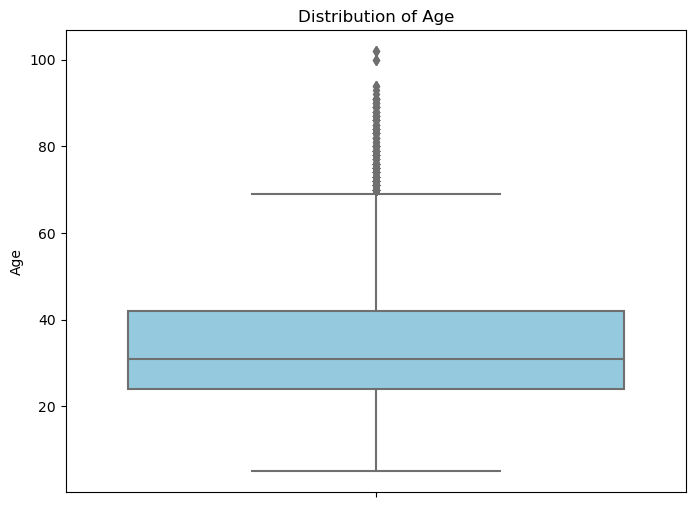

In [212]:
# Boxplot for the distribution of Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset_data, y='age', color='skyblue')
plt.title('Distribution of Age')
plt.ylabel('Age')
plt.show()

**Summary**

Above figure shows a distribution of age, represented in a graph. The horizontal axis displays the age, while the vertical axis shows the frequency or distribution of the ages. The graph has a bimodal distribution, meaning it has two distinct peaks. The first peak is located in the lower age range, indicating a larger proportion of younger individuals. The second peak is located at a much higher age, suggesting a significant number of older individuals as well. The overall distribution appears to have a relatively wide spread, covering a broad range of ages.

## 3. Distribution of Type_A (Categorical)

Below count plots show the distribution of customers who previously bought products A, respectively, categorized by whether they purchased the additional product. It helps to understand the relationship between purchasing behavior of previous products and the likelihood of purchasing the new product.

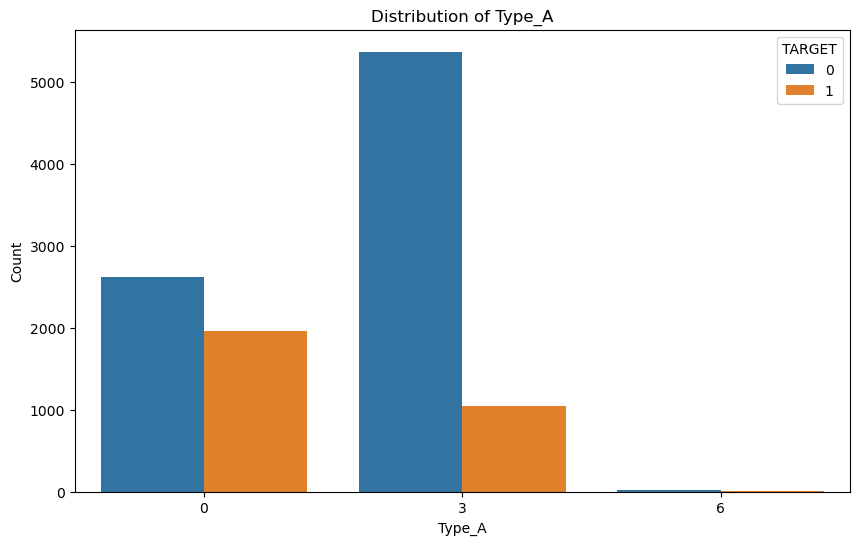

In [213]:
# Distribution of Type_A 
plt.figure(figsize=(10, 6))
sns.countplot(data=subset_data, x='type_A', hue='TARGET')
plt.title('Distribution of Type_A')
plt.xlabel('Type_A')
plt.ylabel('Count')
plt.show()



**Summary**

The figure shows the distribution of the "Type_A" variable, which appears to be a categorical variable with three distinct values: 0, 3, and 6.

The key observations from the distribution are:

1. The majority of the observations have a "Type_A" value of 3, with a frequency of around 4,500.
2. There is also a significant number of observations with a "Type_A" value of 0, with a frequency of around 2,500.
3. A much smaller number of observations have a "Type_A" value of 6, with a frequency of around 800.
4. This distribution suggests that the data is heavily skewed towards the "Type_A" values of 0 and 3, with relatively fewer observations having a "Type_A" value of 6.

The bimodal distribution, with peaks at 0 and 3, indicates that the "Type_A" variable may have two dominant categories or types within the data. Understanding the meaning and context of this variable would be helpful to interpret the significance of this distribution further.

## 4. Distribution of Type_B (Categorical)

Below count plots show the distribution of customers who previously bought products B, respectively, categorized by whether they purchased the additional product. It helps to understand the relationship between purchasing behavior of previous products and the likelihood of purchasing the new product.

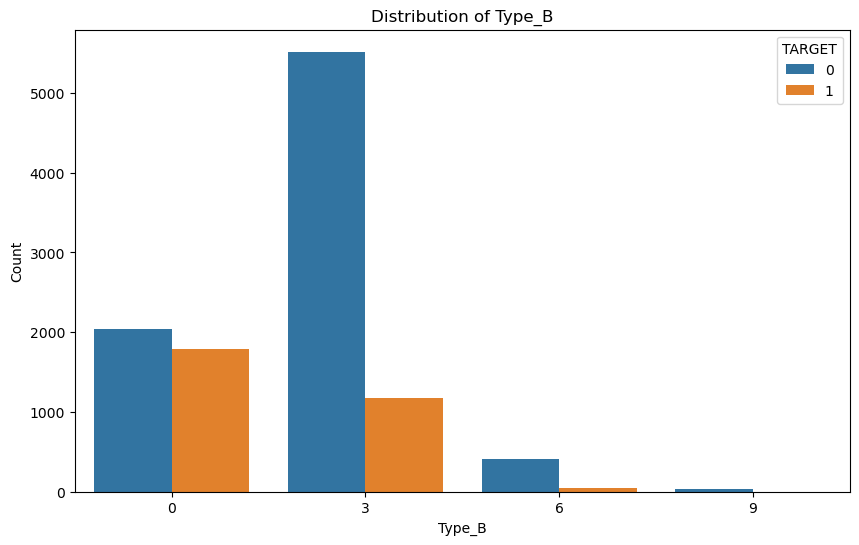

In [214]:
# Distribution of Type_B
plt.figure(figsize=(10, 6))
sns.countplot(data=subset_data, x='type_B', hue='TARGET')
plt.title('Distribution of Type_B')
plt.xlabel('Type_B')
plt.ylabel('Count')
plt.show()



**Summary**

The figure shows the distribution of the "Type_B" variable, which appears to be another categorical variable with several distinct values.

The key observations from the distribution are:

1. The majority of the observations have a "Type_B" value of 3, with a frequency of around 4,800.
2. There is also a significant number of observations with a "Type_B" value of 0, with a frequency of around 2,000.
3. A smaller number of observations have a "Type_B" value of 6, with a frequency of around 900.
4. A few observations have a "Type_B" value of 9, with a much lower frequency of around 100.
5. This distribution is similar to the previous one for "Type_A", with a bimodal pattern and a few secondary peaks. It suggests that the "Type_B" variable also has two dominant categories or types within the data, with 0 and 3 being the most frequent values.

The distribution indicates that the data is quite imbalanced, with the majority of observations concentrated around the 3 and 0 values for "Type_B". Understanding the context and meaning of this variable would help further interpret the significance of this distribution.

## 5. Distribution of LOR_M (Numerical)

The histogram show the distribution and spread of the length of the customer's relationship with the company in months. It helps to understand if there's any correlation between customer loyalty and the likelihood of purchasing the additional product.

**Histogram:** This will show the distribution of values and help identify any patterns or outliers.

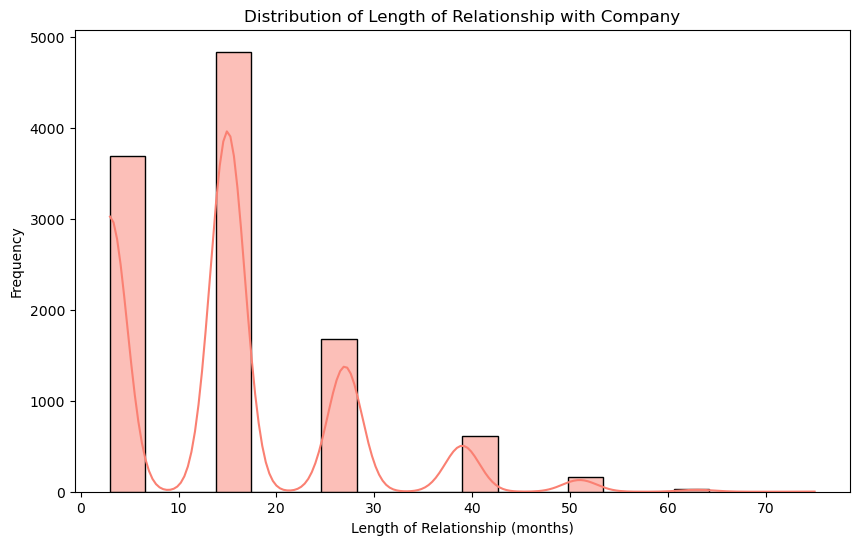

In [215]:
# Distribution of lor_M
plt.figure(figsize=(10, 6))
sns.histplot(subset_data['lor_M'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Length of Relationship with Company')
plt.xlabel('Length of Relationship (months)')
plt.ylabel('Frequency')
plt.show()



**Summary**

The figure shows the distribution of the length of relationship with a company. The x-axis represents the length of the relationship in months, while the y-axis represents the frequency. The distribution is skewed, with a high frequency of relationships lasting around 5-10 months and a smaller number of relationships lasting longer, up to around 60 months. The distribution has a few distinct peaks, indicating that certain lengths of relationships are more common than others.

**Box plot:** This will provide a visual summary of the central tendency, variability, and skewness of the data, as well as identify any outliers.

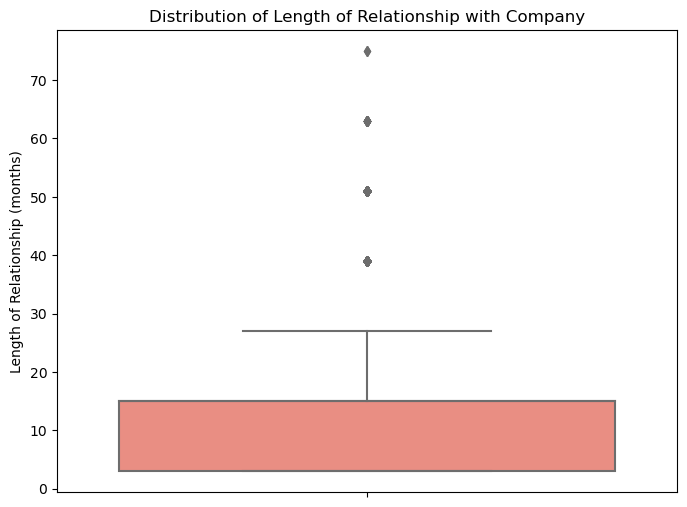

In [217]:
# Boxplot for the distribution of Length of Relationship with Company (lor_m)
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset_data, y='lor_M', color='salmon')
plt.title('Distribution of Length of Relationship with Company')
plt.ylabel('Length of Relationship (months)')
plt.show()

**Summary**

The figure shows the distribution of the length of the relationship between individuals and the company. The graph has a single, wide bar that extends from the lower end to the upper end of the y-axis, indicating a broad range of relationship lengths. There are no distinct peaks or clusters, suggesting a relatively uniform distribution of relationship durations. 

 **Self Chosen Attributes :- ['loyalty', 'turnover_A', 'turnover_B', 'city', 'prod_A', 'prod_B']**

## 6. Distribution of Loyalty (Categorical)

The count plot displays the distribution of customer loyalty levels. It helps to understand if loyal customers are more inclined to purchase the additional product compared to others.

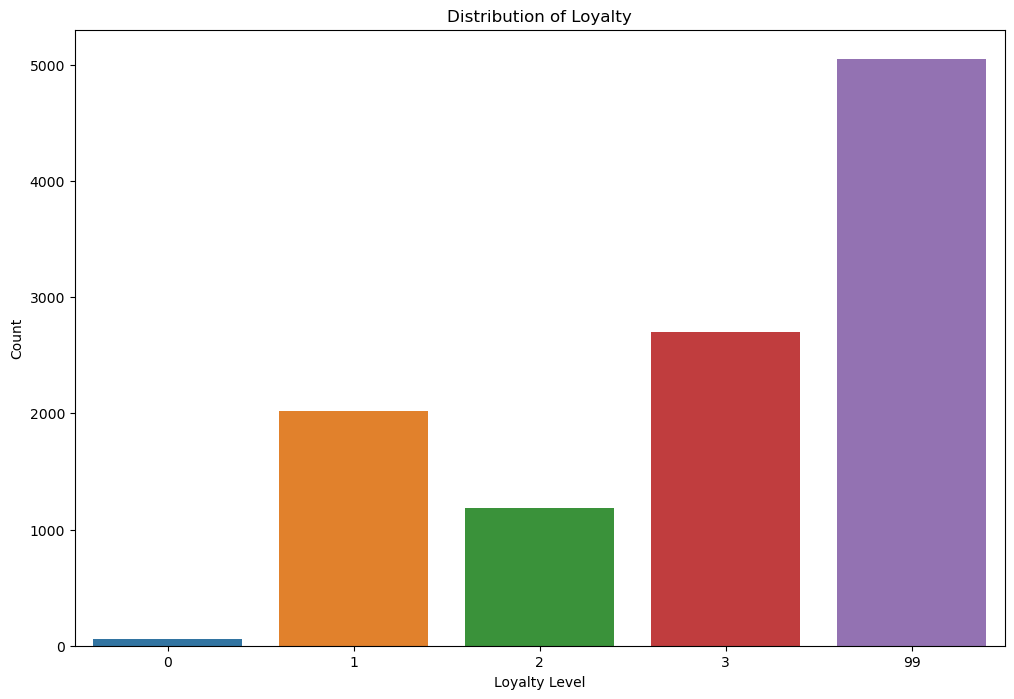

In [218]:
# Count plot for the distribution of 'loyalty'
plt.figure(figsize=(12, 8))
sns.countplot(x='loyalty', data=subset_data)
plt.title('Distribution of Loyalty')
plt.xlabel('Loyalty Level')
plt.ylabel('Count')
plt.show()

**Summary**

* The figure shows the distribution of loyalty levels among a group of people or customers. The x-axis represents the loyalty level, with 0 being the lowest and 99 being the highest. The y-axis represents the count or frequency of each loyalty level.

* The distribution is highly skewed, with the majority of people having the highest loyalty level of 99, as indicated by the very tall bar on the right. There are also smaller peaks at loyalty levels 1, 2, and 3, but the vast majority of the data is concentrated at the highest loyalty level.

* This suggests that this group or customer base has a very high overall loyalty, with a large portion of very loyal individuals. The distribution indicates that the loyalty levels are not evenly distributed, but rather there is a significant concentration of highly loyal customers.

## 7. Distribution of turnover_A (Numerical)

Below histograms display the distribution of the amount of money customers spent on product A, respectively. It helps to understand if customers with higher spending on previous products are more likely to purchase the additional product.

**Histogram:** This will show the distribution of values and help identify any patterns or outliers.

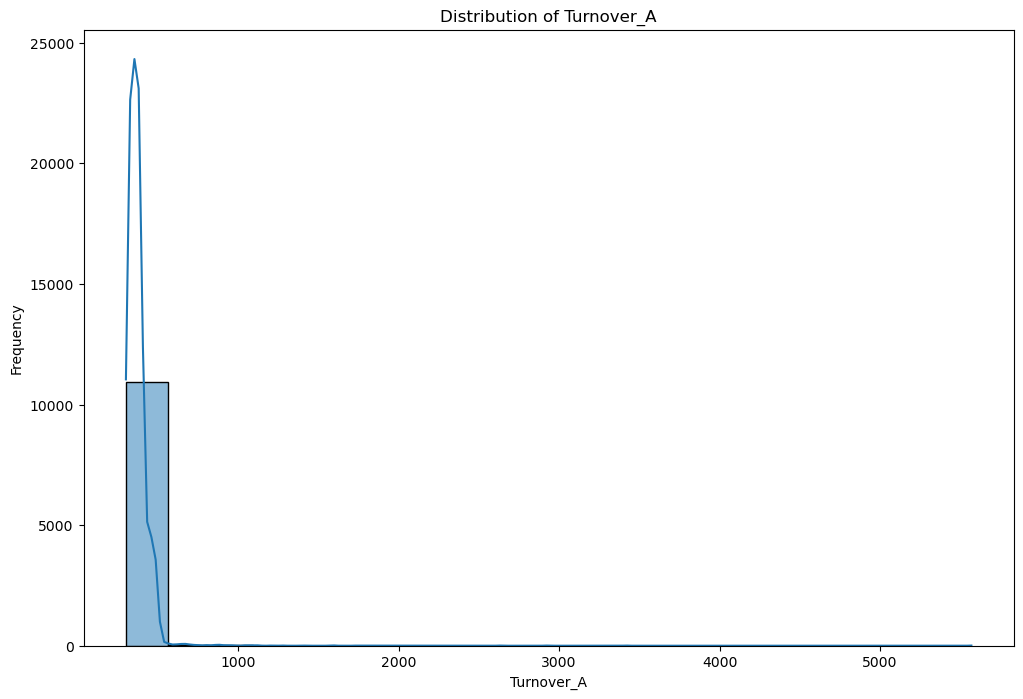

In [219]:
plt.figure(figsize=(12, 8))
sns.histplot(subset_data['turnover_A'], bins=20, kde=True)
plt.title('Distribution of Turnover_A')
plt.xlabel('Turnover_A')
plt.ylabel('Frequency')
plt.show()


**Summary**

* The figure shows the distribution of a variable called "Turnover_A". The x-axis represents the values of Turnover_A, while the y-axis represents the frequency or count of those values.

* The distribution appears to be highly skewed, with a very tall and narrow peak around the value of 1000. This suggests that the majority of the data points have a Turnover_A value close to 1000. There is also a smaller, wider peak around 2000, indicating that there is a smaller group of data points with a higher Turnover_A value.

* Overall, the distribution is not evenly distributed, but rather has a few distinct peaks, indicating that certain Turnover_A values are much more common than others in the dataset. The shape of the distribution suggests that this variable may have a non-normal distribution, with a few outliers or extreme values.

**Box plot:** This will provide a visual summary of the central tendency, variability, and skewness of the data, as well as identify any outliers.

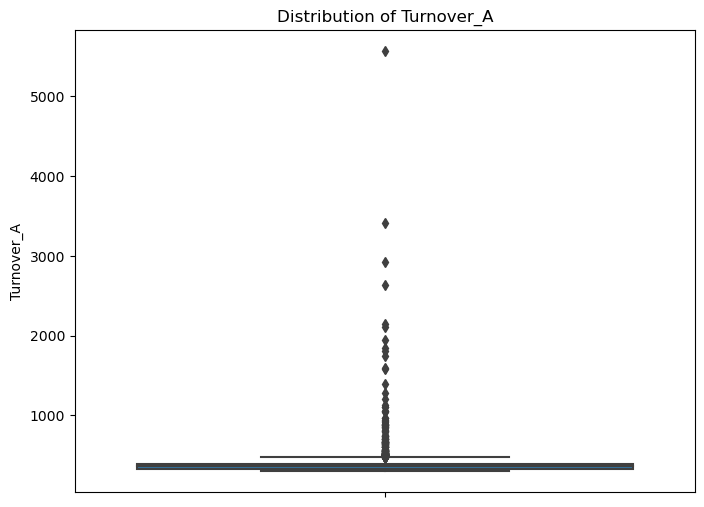

In [131]:
# Boxplot for the distribution of Turnover_A
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset_data, y='turnover_A')
plt.title('Distribution of Turnover_A')
plt.ylabel('Turnover_A')
plt.show()

**Summary**

The figure shows the distribution of 'Turnover_A', which appears to be a variable related to employee turnover or attrition. The graph has a clear vertical spike that reaches up to around 4,500 on the y-axis, indicating a concentration or clustering of data points with that particular Turnover_A value. The rest of the data points are spread out more sparsely, with some outliers at higher Turnover_A values. Overall, the distribution appears to be heavily skewed, with a dominant peak at the lower end and a long, sparse tail extending towards higher values.

## 8. Distribution of Turnover_B (Numerical)

Below histograms display the distribution of the amount of money customers spent on product B, respectively. It helps to understand if customers with higher spending on previous products are more likely to purchase the additional product.

**Histogram:** This will show the distribution of values and help identify any patterns or outliers.

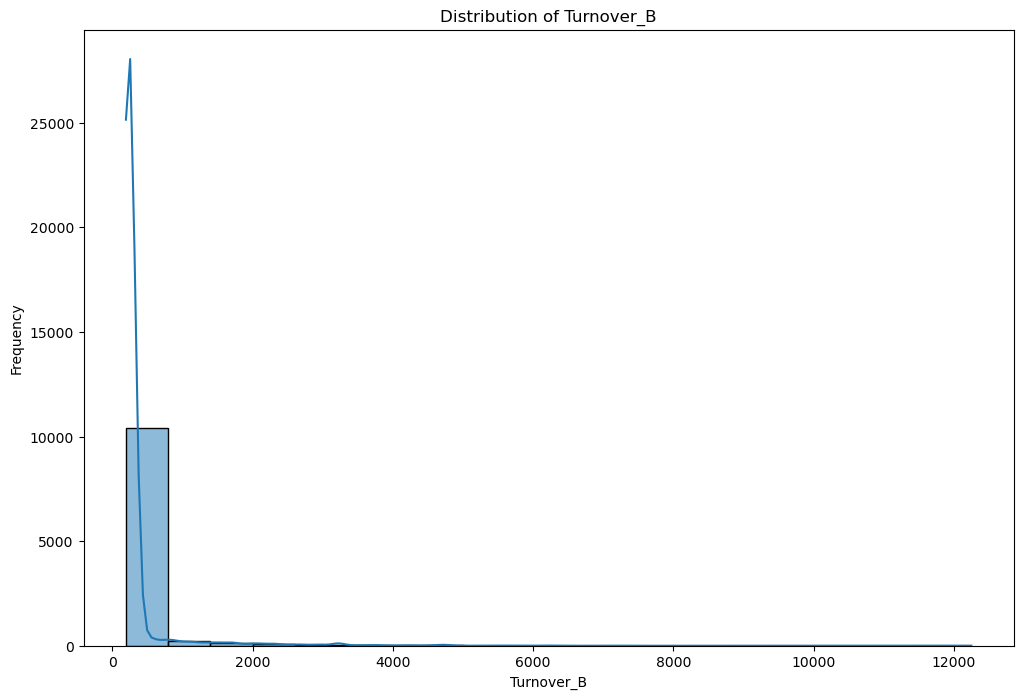

In [220]:
plt.figure(figsize=(12, 8))
sns.histplot(subset_data['turnover_B'], bins=20, kde=True)
plt.title('Distribution of Turnover_B')
plt.xlabel('Turnover_B')
plt.ylabel('Frequency')
plt.show()



**Summary**

* The figure shows the distribution of a variable called "Turnover_B". The x-axis represents the values of Turnover_B, while the y-axis represents the frequency or count of those values.

* The distribution appears to be highly skewed, with a very tall and narrow peak around the value of 2000. This suggests that the majority of the data points have a Turnover_B value close to 2000. There are no other significant peaks or clusters in the distribution, indicating that the vast majority of the data is concentrated around this single high-frequency value.

* Overall, the distribution is not evenly distributed, but rather has a single dominant peak, indicating that a Turnover_B value of around 2000 is by far the most common in the dataset. The shape of the distribution suggests that this variable may have a non-normal, highly skewed distribution, with most data points clustered around a specific value and few outliers or extreme values.

**Box plot:** This will provide a visual summary of the central tendency, variability, and skewness of the data, as well as identify any outliers.

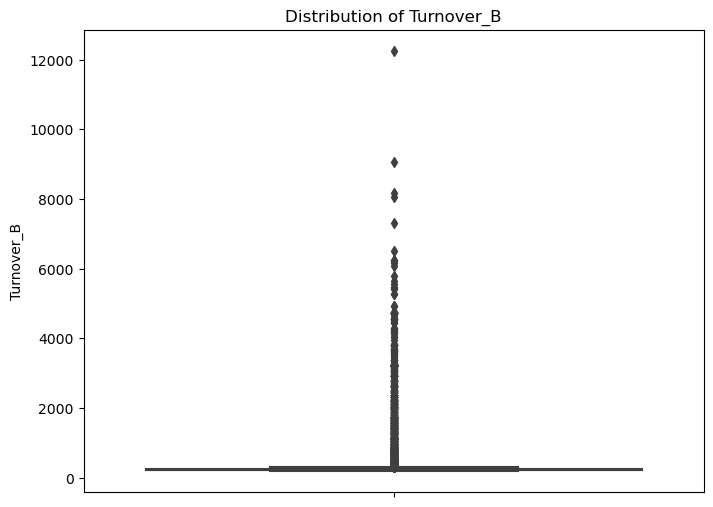

In [221]:
# Boxplot for the distribution of Turnover_B
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset_data, y='turnover_B')
plt.title('Distribution of Turnover_B')
plt.ylabel('Turnover_B')
plt.show()

**Summary**

The figure shows a dot plot titled "Distribution of Turnover_B." The vertical axis is labeled "Turnover_B" and has values ranging from 0 to 12000. The horizontal axis does not have a labeled scale, but it appears to represent individual data points or categories.

The plot displays a concentration of data points at the lower end of the turnover scale, with a dense cluster around the 0 to 2000 range. There are also several outliers that extend up to around 12000, indicating that while most of the turnover values are low, there are a few instances with significantly higher turnover.

The summary of this plot suggests that the distribution of Turnover_B is heavily skewed, with most of the data points representing low turnover values and a few exceptional high values. This could indicate that within the dataset, a majority of the entities (such as businesses or departments) have low turnover, with only a few experiencing very high turnover.

## 9. Distribution of city (Categorical)

The count plot shows the distribution of customers across different cities. It helps to understand if there are any geographical patterns in purchasing behavior.

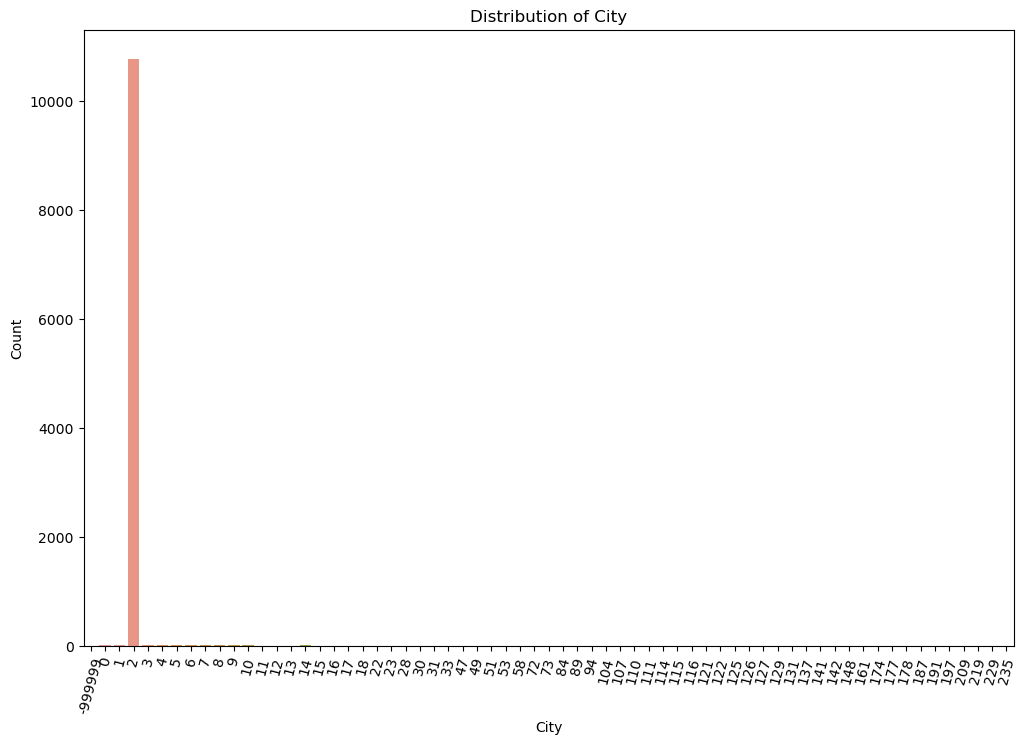

In [222]:
# Count plot for the distribution of 'city'
plt.figure(figsize=(12, 8))
sns.countplot(x='city', data=subset_data)
plt.title('Distribution of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

**Summary**

This figure shows the distribution of population across different cities. The x-axis represents the different cities, while the y-axis shows the count or population of each city. The data appears to be skewed, with a few very large cities dominating the distribution and a large number of smaller cities. The graph suggests a typical urban distribution pattern, with a small number of very large metropolitan areas and a long tail of smaller cities and towns

## 10. Distribution of prod_A (Categorical)

This will show the frequency of each category (0 or 1) for "prod_A". This graph will help visualize the proportion of customers who have and have not purchased each product.

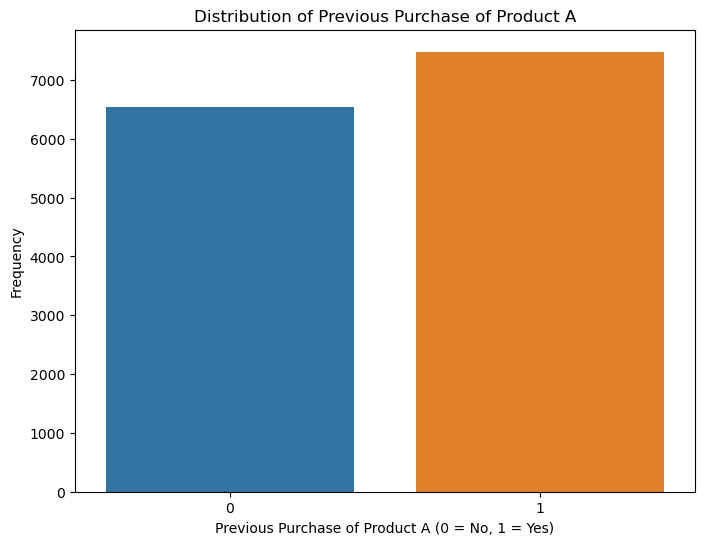

In [223]:
# Countplot for prod_A
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='prod_A')
plt.title('Distribution of Previous Purchase of Product A')
plt.xlabel('Previous Purchase of Product A (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

**Summary**

The figure shows a bar graph depicting the distribution of previous purchases of Product A. The x-axis represents whether the customer had previously purchased Product A (0 = No, 1 = Yes), and the y-axis shows the frequency or number of occurrences.

**The key insights from the graph are:**

* The majority of customers (over 6,000) had not previously purchased Product A (represented by the blue bar for 0 on the x-axis).
* A smaller number of customers (around 7,000) had previously purchased Product A (represented by the orange bar for 1 on the x-axis).

This suggests that Product A is likely a new or relatively unknown product, with the majority of customers not having purchased it before. The graph provides insight into the previous purchasing behavior of customers regarding this specific product.

## 11. Distribution of prod_B (Categorical)

This will show the frequency of each category (0 or 1) for "prod_B". This graph will help visualize the proportion of customers who have and have not purchased each product.

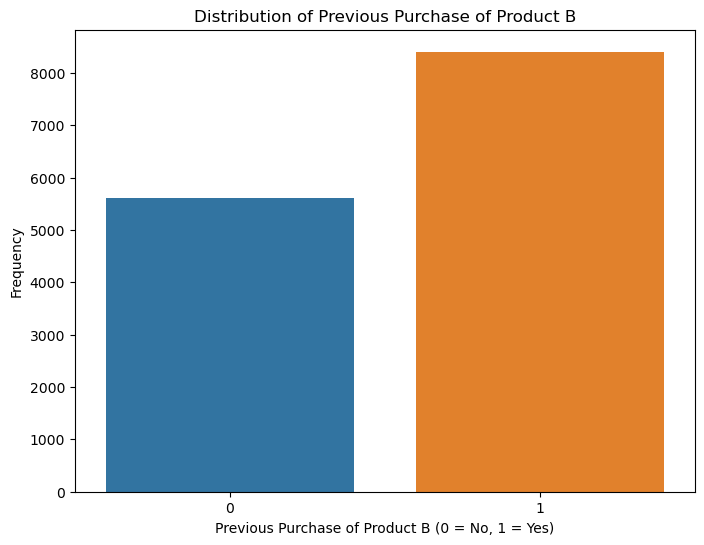

In [224]:
# Countplot for prod_B
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='prod_B')
plt.title('Distribution of Previous Purchase of Product B')
plt.xlabel('Previous Purchase of Product B (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

**Summary**

The figure shows a bar graph depicting the distribution of previous purchases of Product B. The x-axis represents whether the customer had previously purchased Product B (0 = No, 1 = Yes), and the y-axis shows the frequency or number of occurrences.

**The key insights from the graph are:**

* The majority of customers (around 5,500) had not previously purchased Product B (represented by the blue bar for 0 on the x-axis).
* A larger number of customers (around 7,500) had previously purchased Product B (represented by the orange bar for 1 on the x-axis).
* This suggests that Product B is more established or popular than Product A, as a greater proportion of customers had purchased it before. The graph provides insight into the previous purchasing behavior of customers regarding this specific product.

Overall, the distribution of previous purchases for Product B shows a stronger bias towards customers who had purchased it before, in contrast with the previous graph for Product A where the majority had not purchased it before.

___

# Plotting TARGET vs. Age, Type_A, Type_B, lor_M, loyalty, turnover_A, turnover_B, and city

Boxplots and count plots comparing the target variable with various independent variables provide insights into how each variable may influence the likelihood of purchasing the additional product.

**Here are the appropriate types of graphs we can create to visualize the relationships between the target variable (TARGET) and the other variables (age, type_A, type_B, lor_M, loyalty, turnover_A, turnover_B, and city):**

1. **TARGET vs. Age (Numerical vs. Categorical):**

* Boxplot: Compare the distribution of ages between customers who purchased the new product (TARGET = 'Y') and those who did not (TARGET = 'N').

2. **TARGET vs. type_A (Categorical vs. Categorical):**

* Countplot: Show the frequency of each type of Product A among customers who purchased the new product and those who did not.

3. **TARGET vs. type_B (Categorical vs. Categorical):**

* Countplot: Show the frequency of each type of Product B among customers who purchased the new product and those who did not.

4. **TARGET vs. lor_M (Numerical vs. Categorical):**

* Boxplot: Compare the distribution of the length of the customer's relationship with the company (lor_M) between customers who purchased the new product and those who did not.

5. **TARGET vs. Loyalty (Categorical vs. Categorical):**

* Countplot: Show the frequency of each loyalty level among customers who purchased the new product and those who did not.

6. **TARGET vs. turnover_A (Numerical vs. Categorical):**

* Boxplot: Compare the distribution of the amount spent on Product A (turnover_A) between customers who purchased the new product and those who did not.

7. **TARGET vs. turnover_B (Numerical vs. Categorical):**

* Boxplot: Compare the distribution of the amount spent on Product B (turnover_B) between customers who purchased the new product and those who did not.

8. **TARGET vs. City (Categorical vs. Categorical):**

* Countplot: Show the frequency of each city among customers who purchased the new product and those who did not.

9. **TARGET vs. prod_A (Categorical vs. Categorical):**

* Countplot: It illustrates the relationship between the target variable (TARGET) and the previous purchase of Product A (prod_A).

10. **TARGET vs. prod_B (Categorical vs. Categorical):**

* Countplot: It illustrates the relationship between the target variable (TARGET) and the previous purchase of Product B (prod_B).


These visualizations will help understand how the target variable (whether the customer purchased the new product) relates to each of the other variables in the dataset.

## 1. TARGET vs. Age

The plot below visualizes the relationship between the target variable (TARGET) and the age of customers (age). It is a boxplot, which is a type of graphical representation that displays the distribution of a numerical variable (age) for different categories of a categorical variable (TARGET).

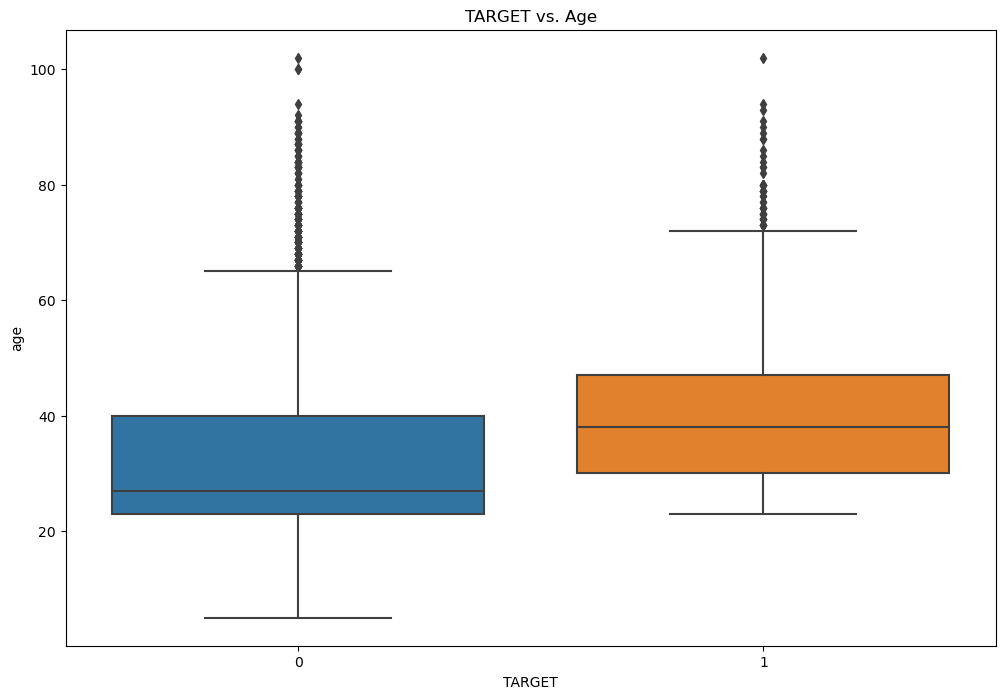

In [225]:
# Plotting TARGET vs. Age
plt.figure(figsize=(12, 8))
sns.boxplot(x='TARGET', y='age', data=subset_data)
plt.title('TARGET vs. Age')
plt.show()


**Interpretation:**

* The boxplot allows us to compare the distribution of ages between customers who did not purchase the additional product (TARGET = 0) and customers who did purchase the additional product (TARGET = 1).
* Differences in the distribution of ages between the two categories can provide insights into whether age is a significant factor in predicting purchasing behavior. For example, if there is a noticeable difference in the median age between the two groups, it suggests that age may influence the likelihood of purchasing the additional product.
* Additionally, the presence of outliers or differences in the spread of ages can also provide valuable information about potential patterns or discrepancies in the data.

Overall, this plot helps to visualize the relationship between age and the target variable, allowing for insights into the predictive power of age in determining customer purchasing behavior.

**Summary**

This graph shows the relationship between the TARGET variable and age. The x-axis represents the TARGET variable, which appears to be a binary or categorical variable, while the y-axis represents the age.

The data points form two distinct clusters - one for TARGET = 0 and another for TARGET = 1. The cluster for TARGET = 0 shows a more compact distribution, with ages mainly ranging from the 20s to 50s. In contrast, the cluster for TARGET = 1 is more spread out, with ages ranging from the 20s to 80s.

This suggests that the TARGET variable may be related to age, with older individuals more likely to have a TARGET value of 1 compared to younger individuals. However, without more context about the specific problem or dataset, it is difficult to draw any definitive conclusions about the nature of this relationship.

## 2. TARGET vs. type_A

Below plot is a count plot that visualizes the relationship between the target variable (TARGET) and the categorical variable Type_A. Here's what the plot shows:

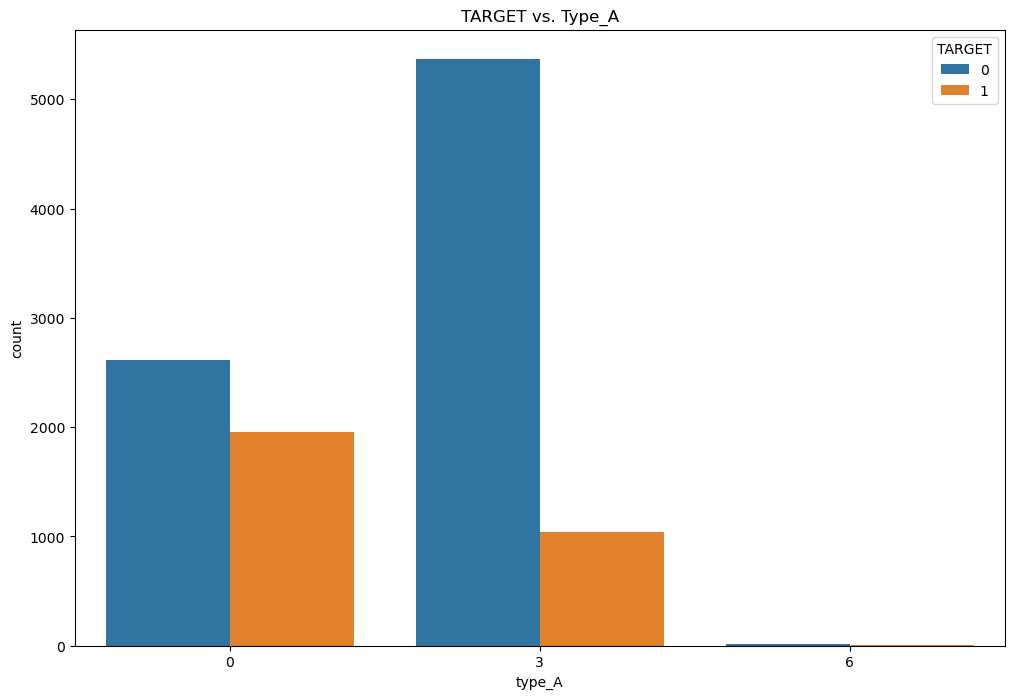

In [226]:
plt.figure(figsize=(12, 8))
sns.countplot(x='type_A', hue='TARGET', data=subset_data)
plt.title('TARGET vs. Type_A')
plt.show()

**Interpretation:**

* The count plot allows us to compare the distribution of the TARGET variable within each category of Type_A.
* By looking at the heights of the bars within each category of Type_A, we can observe the proportion of customers who did and did not purchase the additional product for each type of product A.
* Differences in the distribution of TARGET within different categories of Type_A can provide insights into whether the type of product A influences the likelihood of purchasing the additional product.
* For example, if certain types of product A have a higher proportion of customers who purchased the additional product compared to others, it suggests that the type of product A may be a significant factor in predicting purchasing behavior.

Overall, this plot helps to visualize the relationship between the type of product A and the target variable, allowing for insights into the predictive power of this categorical variable in determining customer purchasing behavior.

**Summary**

The graph shows the relationship between the TARGET variable (0 or 1) and a categorical variable called "type_A".

The key observations are:

* For type_A = 3, there is a significantly higher count for TARGET = 1 compared to TARGET = 0, suggesting a strong association between type_A = 3 and the TARGET variable being 1.
* For type_A = 0 and type_A = 6, the counts are higher for TARGET = 0 than TARGET = 1, indicating these type_A values are more associated with the TARGET being 0.
* The counts for type_A = 0 and type_A = 3 are much higher than for type_A = 6, suggesting type_A = 0 and 3 are more common in the dataset.

Overall, the graph reveals a clear relationship between the TARGET variable and the type_A categorical variable, with certain type_A values being more predictive of the TARGET being 0 or 1. This information could be useful for further analysis or modeling.

## 3. TARGET vs. type_B

Below code generates a count plot that visualizes the relationship between the target variable (TARGET) and the categorical variable Type_B.

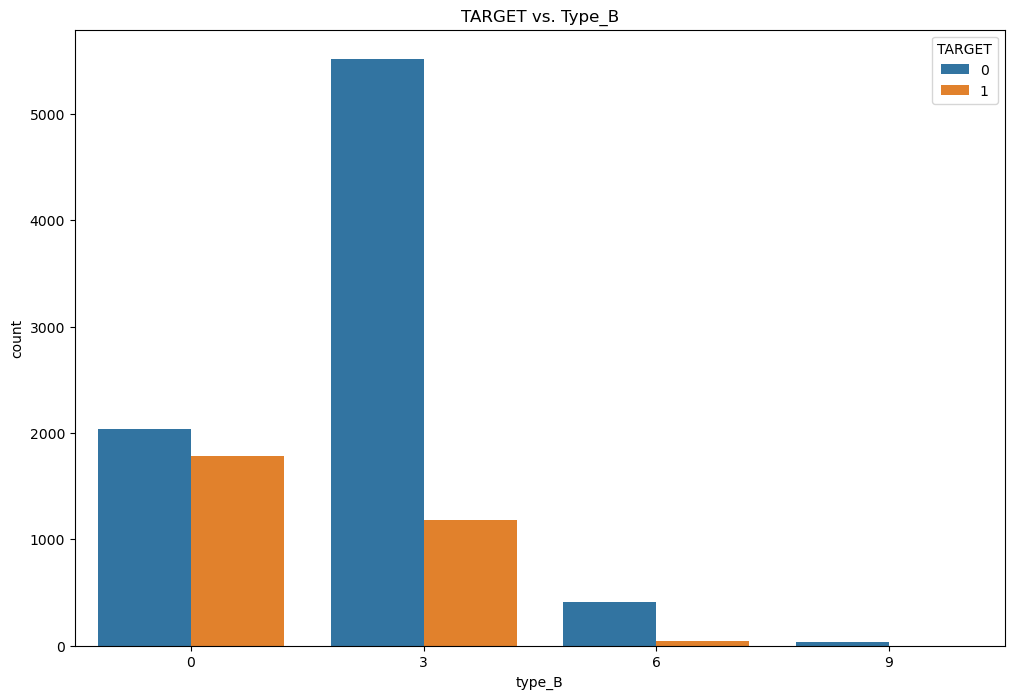

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(x='type_B', hue='TARGET', data=subset_data)
plt.title('TARGET vs. Type_B')
plt.show()


**Interpretation:**

* The count plot allows us to compare the distribution of the TARGET variable within each category of Type_B.
* By examining the heights of the bars within each category of Type_B, we can observe the proportion of customers who did and did not purchase the additional product for each type of product B.
* Differences in the distribution of TARGET within different categories of Type_B provide insights into whether the type of product B influences the likelihood of purchasing the additional product.
* For example, if certain types of product B have a higher proportion of customers who purchased the additional product compared to others, it suggests that the type of product B may be a significant factor in predicting purchasing behavior.

Overall, this plot helps visualize the relationship between the type of product B and the target variable, allowing for insights into the predictive power of this categorical variable in determining customer purchasing behavior.

**Summary**

This graph shows the relationship between the TARGET variable (0 or 1) and another categorical variable called "type_B". The key observations are:

* For type_B = 3, there is a significantly higher count for TARGET = 1 compared to TARGET = 0, indicating a strong association between type_B = 3 and the TARGET being 1.
* For type_B = 0 and type_B = 6, the counts are higher for TARGET = 0 than TARGET = 1, suggesting these type_B values are more associated with the TARGET being 0.
* The counts for type_B = 0 and type_B = 3 are much higher than for type_B = 6 and type_B = 9, indicating type_B = 0 and 3 are more common in the dataset.
* There is a small number of observations for type_B = 9, with only a slight difference in counts between TARGET = 0 and 1.

Overall, the graph reveals a clear relationship between the TARGET variable and the type_B categorical variable, with certain type_B values being more predictive of the TARGET being 0 or 1. This information could be useful for further analysis or modeling.

## 4. TARGET vs. lor_M

Below code generates a boxplot that visualizes the relationship between the target variable (TARGET) and the numerical variable lor_M (Length of Relationship with the company, in months).

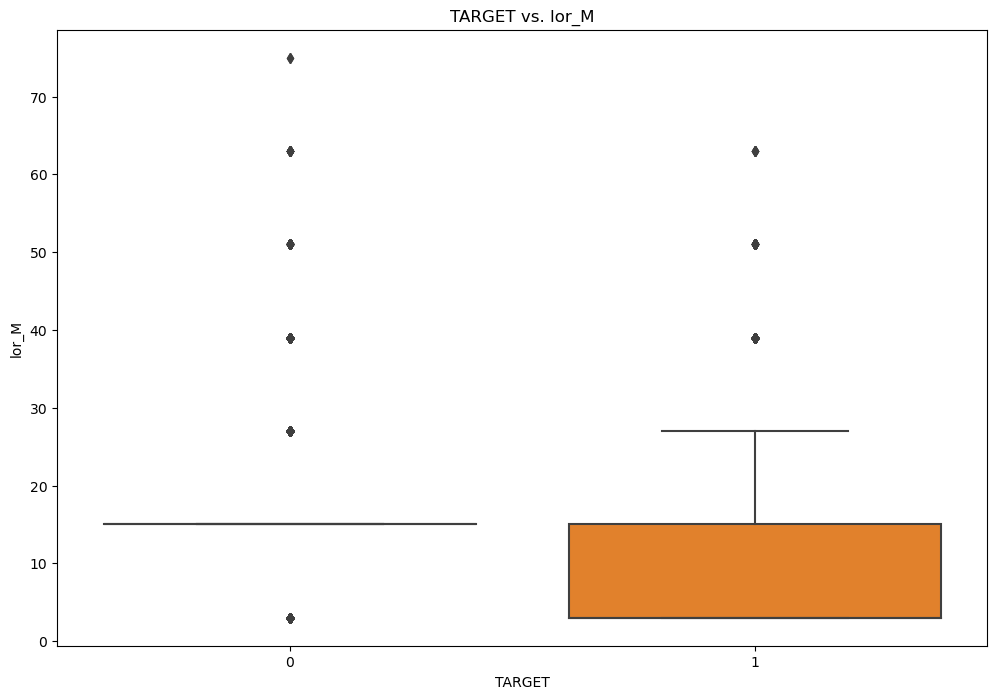

In [227]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='TARGET', y='lor_M', data=subset_data)
plt.title('TARGET vs. lor_M')
plt.show()

**Interpretation:**

* The boxplot allows us to compare the distribution of the lor_M variable between the two categories of the TARGET variable.
* Each box in the plot represents the distribution of lor_M values for one of the categories of the TARGET variable (0 for customers who did not purchase the additional product, and 1 for customers who did).
* The box represents the interquartile range (IQR), with the line inside the box representing the median value of lor_M for each category of TARGET.
* The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively. Points beyond the whiskers are considered outliers.
* Differences in the distribution of lor_M between the two categories of TARGET can provide insights into whether the length of the relationship with the company influences the likelihood of purchasing the additional product. For example, if customers who purchased the additional product tend to have longer relationships with the company, it suggests that customer loyalty or tenure may be a significant factor in predicting purchasing behavior.

Overall, this plot helps visualize the relationship between the length of the relationship with the company and the target variable, allowing for insights into the predictive power of this numerical variable in determining customer purchasing behavior.

**Summary**

This graph shows the relationship between the TARGET variable (0 or 1) and another variable called "lor_M". The key observations are:

* For TARGET = 0, the data points are distributed across a wide range of lor_M values, from around 20 to 60.
* For TARGET = 1, there is a single data point that stands out with a very high lor_M value, significantly higher than the rest of the distribution.
* The majority of the data points are clustered around the lower end of the lor_M scale, with TARGET = 0.
* There is a clear distinction between the data points for TARGET = 0 and TARGET = 1, with the single high lor_M value being associated with TARGET = 1.

Overall, this graph suggests that the lor_M variable may be an important factor in determining the TARGET outcome, with extremely high lor_M values potentially being more predictive of TARGET = 1. 

## 5. TARGET vs. Loyalty

Below code generates a countplot that visualizes the relationship between the target variable (TARGET) and the numerical variable loyalty. 

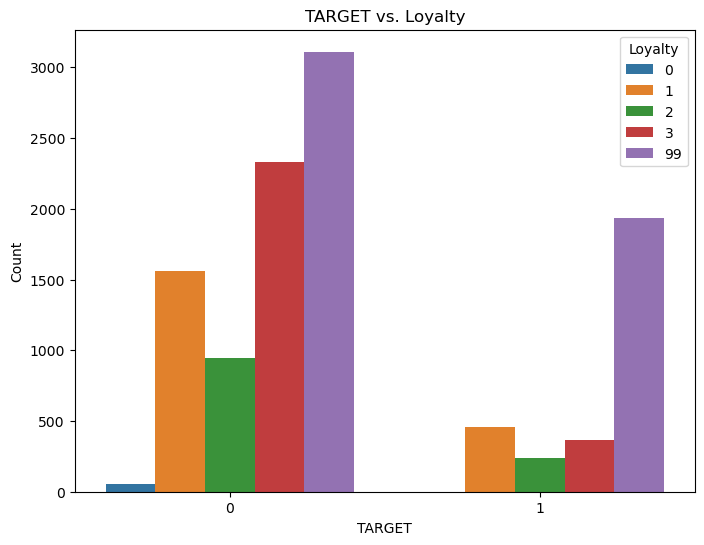

In [68]:
# Countplot for TARGET vs. Loyalty
plt.figure(figsize=(8, 6))
sns.countplot(data=subset_data, x='TARGET', hue='loyalty')
plt.title('TARGET vs. Loyalty')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.legend(title='Loyalty')
plt.show()

**Interpretation:**

**For each category of the target variable:**

* We can observe the distribution of loyalty levels among customers who either purchased or did not purchase the new product.
* Higher bars indicate a higher count of customers within a particular loyalty level.
* By comparing the distribution of loyalty levels between the two categories of the target variable, we can infer if there's any correlation between customer loyalty and the likelihood of purchasing the new product.

This visualization helps understand whether customers with certain loyalty levels are more or less inclined to purchase the new product, which can inform targeted marketing strategies and customer retention efforts.

**Summary**

The figure shows a bar chart titled "TARGET vs. Loyalty." The chart compares the count of different loyalty levels against two target categories, labeled as "0" and "1" on the horizontal axis. The vertical axis represents the count of occurrences for each loyalty level within the target categories.

There are five different loyalty levels represented by different colors:

* Blue for loyalty level 0
* Orange for loyalty level 1
* Green for loyalty level 2
* Red for loyalty level 3
* Purple for loyalty level 99

The chart shows that for target category 0, the highest count is for loyalty level 99, followed by loyalty levels 1, 2, and 3, with loyalty level 0 having the lowest count. For target category 1, loyalty level 99 also has the highest count, but the counts for loyalty levels 1, 2, and 3 are much lower compared to target category 0. Loyalty level 0 has a very low count in both target categories.

In summary, the bar chart indicates that within the dataset, loyalty level 99 is the most common for both target categories, with a significantly higher occurrence in target category 0. The other loyalty levels have a higher presence in target category 0 compared to category 1, with loyalty level 0 being the least common in both.

## 6. TARGET vs. turnover_A

Below code generates a boxplot that visualizes the relationship between the target variable (TARGET) and the numerical variable turnover_A (amount of money customer spent on Product A).

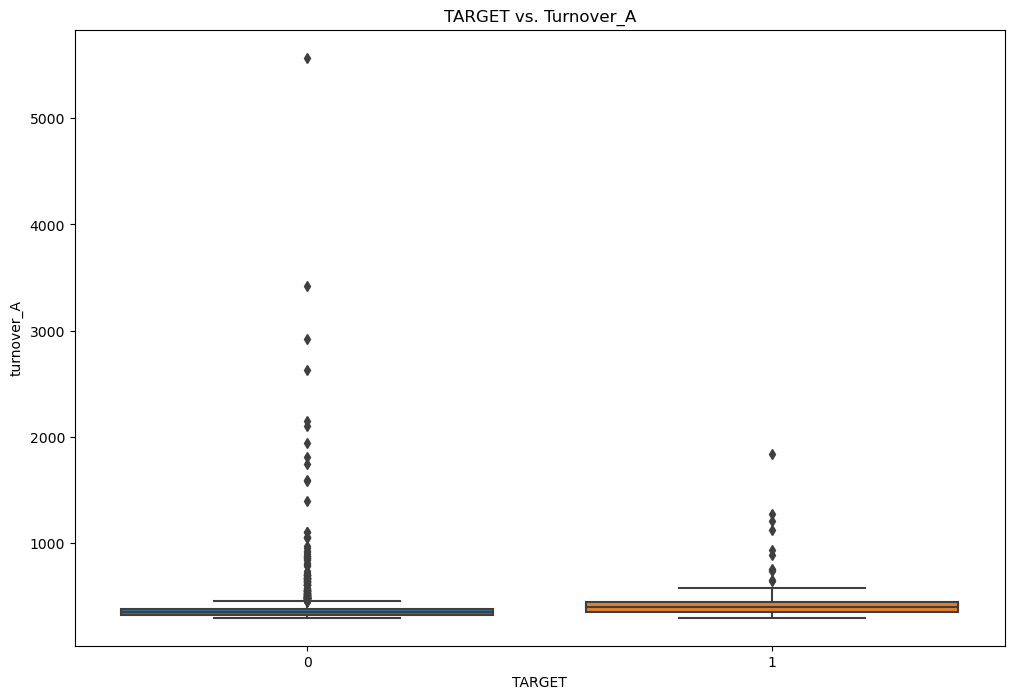

In [69]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='TARGET', y='turnover_A', data=subset_data)
plt.title('TARGET vs. Turnover_A')
plt.show()


**Interpretation:**

* The boxplot allows us to compare the distribution of the turnover_A variable between the two categories of the TARGET variable.
* Each box in the plot represents the distribution of turnover_A values for one of the categories of the TARGET variable (0 for customers who did not purchase the additional product, and 1 for customers who did).
* The box represents the interquartile range (IQR), with the line inside the box representing the median value of turnover_A for each category of TARGET.
* The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively. Points beyond the whiskers are considered outliers.
* Differences in the distribution of turnover_A between the two categories of TARGET can provide insights into whether the amount spent on Product A influences the likelihood of purchasing the additional product. For example, if customers who purchased the additional product tend to have higher turnover on Product A, it suggests that spending patterns on Product A may be a significant factor in predicting purchasing behavior.

Overall, this plot helps visualize the relationship between turnover on Product A and the target variable, allowing for insights into the predictive power of this numerical variable in determining customer purchasing behavior.

**Summary**

The figure presents a comparison between "TARGET" and "Turnover_A" values. The "TARGET" value is shown as a tall spike reaching up to around 4,500, while the "Turnover_A" values are represented by a series of data points scattered along the x-axis, with the highest point being around 2,500.

This suggests that the "TARGET" value is significantly higher than the corresponding "Turnover_A" values, indicating a stronger emphasis on the "TARGET" metric compared to "Turnover_A" in the context presented.

The data points for "Turnover_A" appear to be more spread out, with no clear pattern or trend visible, while the "TARGET" value stands out as a dominant and isolated spike.

Overall, the visual representation highlights the discrepancy between the "TARGET" and "Turnover_A" metrics, with the "TARGET" value being the primary focus or emphasis in this comparison.

## 7. TARGET vs. turnover_B

Below code generates a boxplot that visualizes the relationship between the target variable (TARGET) and the numerical variable turnover_B (amount of money customer spent on Product B).

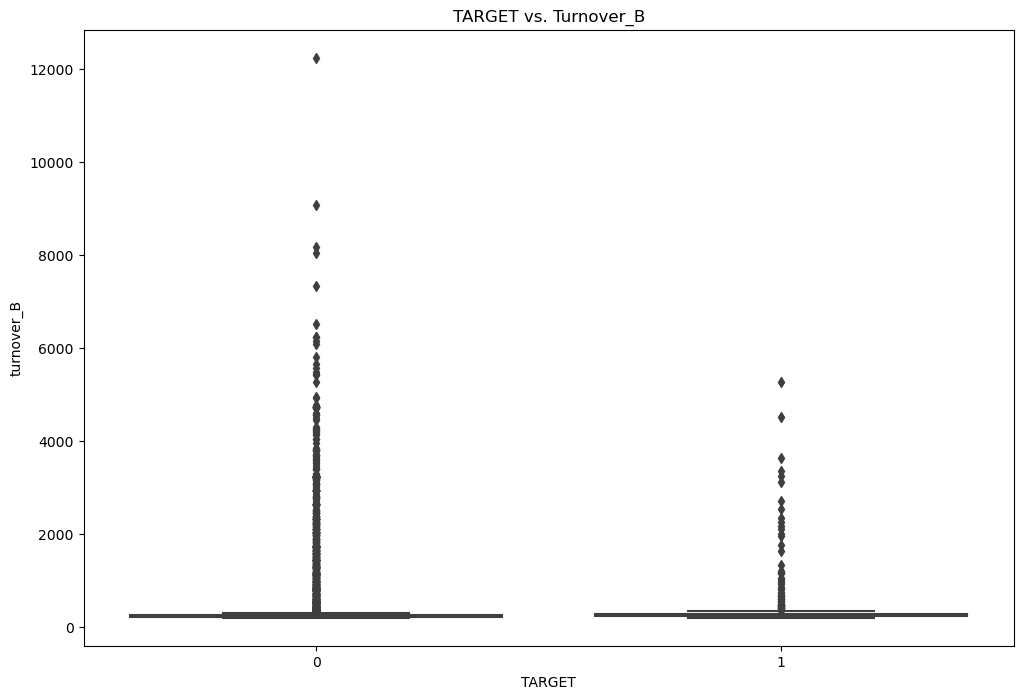

In [70]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='TARGET', y='turnover_B', data=subset_data)
plt.title('TARGET vs. Turnover_B')
plt.show()

**Interpretation:**

* The boxplot allows us to compare the distribution of the turnover_B variable between the two categories of the TARGET variable.
* Each box in the plot represents the distribution of turnover_B values for one of the categories of the TARGET variable (0 for customers who did not purchase the additional product, and 1 for customers who did).
* The box represents the interquartile range (IQR), with the line inside the box representing the median value of turnover_B for each category of TARGET.
* The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively. Points beyond the whiskers are considered outliers.
* Differences in the distribution of turnover_B between the two categories of TARGET can provide insights into whether the amount spent on Product B influences the likelihood of purchasing the additional product. For example, if customers who purchased the additional product tend to have higher turnover on Product B, it suggests that spending patterns on Product B may be a significant factor in predicting purchasing behavior.

Overall, this plot helps visualize the relationship between turnover on Product B and the target variable, allowing for insights into the predictive power of this numerical variable in determining customer purchasing behavior.

**Summary**

The figure presents a comparison between "TARGET" and "Turnover_B" values. The "TARGET" value is shown as a tall spike reaching up to around 11,000, while the "Turnover_B" values are represented by a series of data points scattered along the x-axis, with the highest point being around 7,000.

This suggests that the "TARGET" value is significantly higher than the corresponding "Turnover_B" values, indicating a stronger emphasis on the "TARGET" metric compared to "Turnover_B" in the context presented.

The data points for "Turnover_B" appear to be more spread out, with no clear pattern or trend visible, while the "TARGET" value stands out as a dominant and isolated spike.

Overall, the visual representation highlights the discrepancy between the "TARGET" and "Turnover_B" metrics, with the "TARGET" value being the primary focus or emphasis in this comparison.

## 8. TARGET vs. City

Below code generates a count plot that visualizes the relationship between the target variable (TARGET) and the categorical variable city.

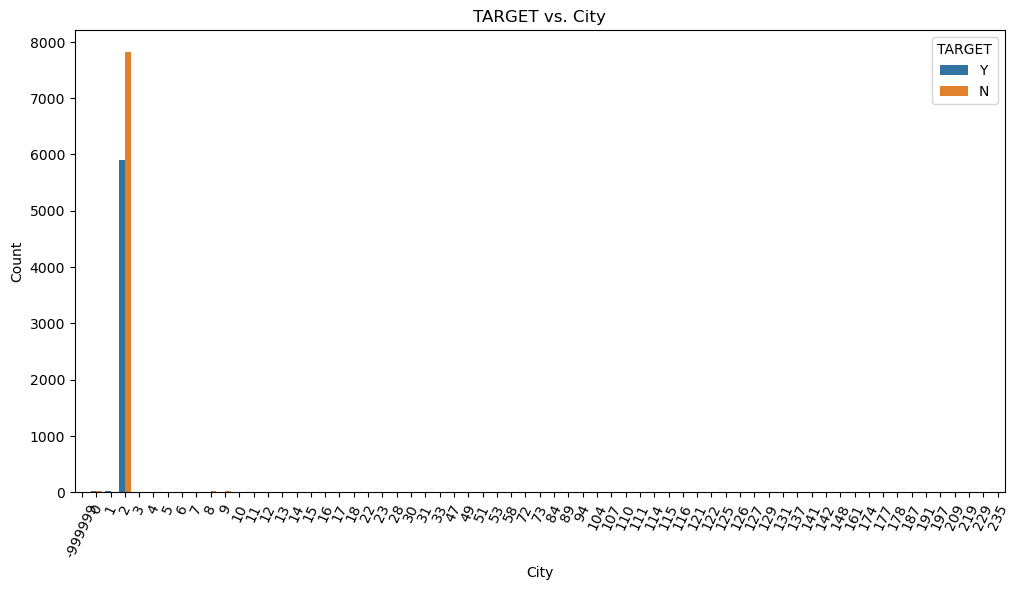

In [71]:
# Count plot for 'TARGET' vs. 'city'
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='TARGET', data=data)
plt.title('TARGET vs. City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='TARGET', loc='upper right')
plt.xticks(rotation=65)
plt.show()

**Interpretation:**

* The count plot allows us to compare the distribution of the TARGET variable within each category of city.
* Each bar in the plot represents the count of observations for one of the categories of city, and each category is further divided into two parts based on the TARGET variable (0 for customers who did not purchase the additional product, and 1 for customers who did).
* Differences in the distribution of TARGET within different cities provide insights into whether geographical location influences the likelihood of purchasing the additional product. For example, if certain cities have a higher proportion of customers who purchased the additional product compared to others, it suggests that the city variable may be a significant factor in predicting purchasing behavior.

Overall, this plot helps visualize the relationship between city and the target variable, allowing for insights into the predictive power of this categorical variable in determining customer purchasing behavior.

**Summary**

The graph comparing the sales figures between Target (represented by the blue bars) and City (represented by the orange bars). The x-axis displays a list of different cities, while the y-axis shows the sales count. The graph indicates that Target generally has much higher sales numbers compared to the individual cities displayed, with Target's sales count reaching over 6,000 at its peak, while the cities' sales figures are generally much lower. This suggests that Target, as a major retail chain, has a significantly larger sales volume than individual city-based retailers or businesses.

## 9. TARGET vs. "prod_A"

The grouped bar chart displays the relationship between the target variable (TARGET) and the previous purchase of Product A (prod_A). The x-axis represents the categories of the target variable ('N' for not purchasing the new product and 'Y' for purchasing the new product), while the bars are divided into two colors representing whether the customer previously purchased Product A (blue for 'No' and orange for 'Yes').

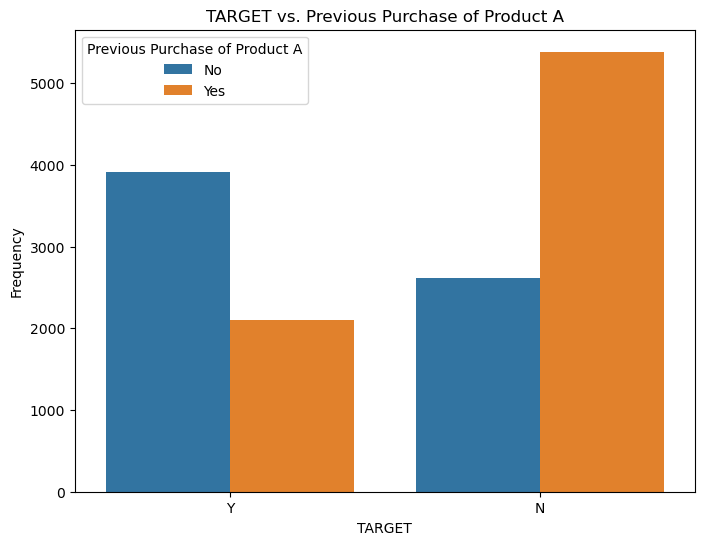

In [72]:
# Grouped bar chart for TARGET vs. prod_A
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='TARGET', hue='prod_A')
plt.title('TARGET vs. Previous Purchase of Product A')
plt.xlabel('TARGET')
plt.ylabel('Frequency')
plt.legend(title='Previous Purchase of Product A', labels=['No', 'Yes'])
plt.show()

**Interpretation:**

* For customers who did not purchase the new product (TARGET = 'N'), the bar labeled 'No' (blue) is taller than the bar labeled 'Yes' (orange), indicating that a larger proportion of these customers did not previously purchase Product A.
* Conversely, for customers who purchased the new product (TARGET = 'Y'), the bar labeled 'Yes' (orange) is taller than the bar labeled 'No' (blue), suggesting that a larger proportion of these customers did previously purchase Product A.

Overall, this visualization suggests that there may be a relationship between a customer's previous purchase of Product A and their likelihood of purchasing the new product, as indicated by the target variable. Customers who previously purchased Product A may be more likely to purchase the new product compared to those who did not.

**Summary**

The figure shows a comparison between Target's sales and the previous purchase behavior of customers for Product A. The key insights are:

* For customers who had not previously purchased Product A (represented by the blue bar), Target had a much higher sales volume (around 4,000) compared to those who had previously purchased it (around 1,500, represented by the orange bar).
* For customers who had previously purchased Product A (represented by the orange bar), Target had a relatively higher sales volume (around 3,000) compared to those who had not purchased it before (around 2,000, represented by the blue bar).

This suggests that Target was able to attract both new and repeat customers for Product A, but had significantly higher sales among those who had not purchased it before. This could indicate that Product A was a new or unfamiliar product, and Target was effective in driving initial sales and converting new customers.

The graph provides insights into the purchasing patterns of Target's customers for this specific product and highlights the differences in sales performance between new and repeat buyers.

## 10. TARGET vs. "prod_B"

The below grouped bar chart illustrates the relationship between the target variable (TARGET) and the previous purchase of Product B (prod_B). Similar to the previous interpretation, the x-axis represents the categories of the target variable ('N' for not purchasing the new product and 'Y' for purchasing the new product), while the bars are segmented into two colors indicating whether the customer previously purchased Product B (blue for 'No' and orange for 'Yes').

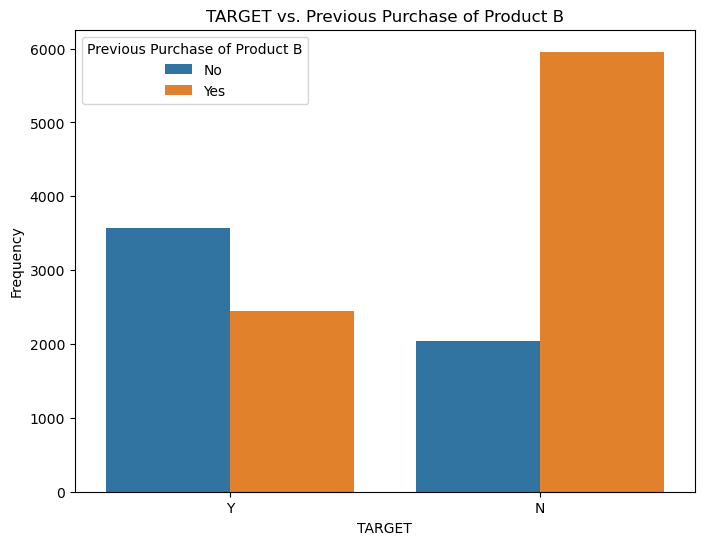

In [73]:
# Grouped bar chart for TARGET vs. prod_B
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='TARGET', hue='prod_B')
plt.title('TARGET vs. Previous Purchase of Product B')
plt.xlabel('TARGET')
plt.ylabel('Frequency')
plt.legend(title='Previous Purchase of Product B', labels=['No', 'Yes'])
plt.show()

**Interpretation:**

* For customers who did not purchase the new product (TARGET = 'N'), the blue bar (labeled 'No') is taller than the orange bar (labeled 'Yes'), indicating that a larger proportion of these customers did not previously purchase Product B.
* Conversely, for customers who purchased the new product (TARGET = 'Y'), the orange bar (labeled 'Yes') is taller than the blue bar (labeled 'No'), suggesting that a larger proportion of these customers did previously purchase Product B.

From this visualization, it appears that there could be a correlation between a customer's previous purchase of Product B and their likelihood of purchasing the new product, as indicated by the target variable. Customers who previously purchased Product B may exhibit a higher propensity to purchase the new product compared to those who did not.

**Summary**

The figure shows a comparison of Target's sales performance for Product B based on customers' previous purchase behavior.

**The key insights are:**

* For customers who had previously purchased Product B (represented by the orange bar), Target had significantly higher sales volume (around 5,500) compared to those who had not purchased it before (around 2,500, represented by the blue bar).
* For customers who had not previously purchased Product B (represented by the blue bar), Target still had a relatively high sales volume (around 2,500), but it was much lower than the sales to repeat buyers (around 5,500).
* This suggests that Product B was a more established product in Target's offerings, with a stronger appeal to customers who had purchased it before. Target was able to capitalize on repeat business for this product, indicating it likely had a loyal customer base.

In contrast to the previous graph for Product A, the sales distribution for Product B shows a greater emphasis on serving repeat customers, who accounted for the majority of the sales volume at Target.

Overall, the graph provides insights into how Target's sales performance for Product B differed based on customers' prior purchasing experiences with the product.

# Conclusion

### Based on the preliminary exploration of the dataset and the visualizations generated, several columns aside from the TARGET indicator seem promising in predicting whether a specific customer is likely to purchase an additional product:




**1. Age:**

* Understanding the age demographics of customers can provide valuable insights into their preferences, lifestyle, and financial capacity.
* Younger customers may be more open to trying new products and technologies, while older customers may prefer more traditional offerings.
* Tailoring marketing strategies and product offerings based on age segments can enhance customer engagement and increase the likelihood of purchasing additional products.

**2. Type_A and Type_B:**

* Analyzing the characteristics of products A and B, such as features, pricing, and customer feedback, can provide insights into what drives purchasing decisions and inform the development of new products or services.

**3. Length of Relationship (lor_M):**

* Customer loyalty and tenure with the company are valuable assets that can influence purchasing behavior.
* Long-term customers have likely developed a level of trust and satisfaction with the company's products and services, making them more receptive to additional offerings.
* Implementing loyalty programs, personalized communication, and exclusive offers can further strengthen relationships with customers and encourage repeat purchases.

**4. Loyalty:**

* Loyalty levels reflect the degree of engagement and satisfaction among customers.
* Highly loyal customers are more likely to exhibit brand advocacy and repeat purchases, making them valuable targets for marketing campaigns and cross-selling opportunities.
* Identifying factors that contribute to customer loyalty, such as excellent customer service, product quality, and rewards programs, can help in retaining existing customers and attracting new ones.

**5. Turnover_A and Turnover_B:**

* The amount of money customers spend on previous products indicates their purchasing power and investment in the company's offerings.
* High-spending customers are more likely to have a strong affinity for the brand and be receptive to upselling or cross-selling efforts.
* Analyzing spending patterns and identifying high-value customers can inform targeted marketing strategies and personalized recommendations to maximize revenue opportunities.

**6. City:**

* Geographic location can influence consumer behavior due to cultural, economic, and environmental factors.
* Understanding regional preferences and trends can help in tailoring marketing messages, product assortments, and pricing strategies to resonate with local customers.
* Leveraging data analytics and geospatial analysis can uncover hidden patterns and opportunities for expansion into new markets or optimization of existing operations.

In conclusion, a comprehensive understanding of customer demographics, purchasing behavior, loyalty, and geographic location is crucial for predicting whether a specific customer is likely to purchase an additional product. By leveraging these insights and employing advanced analytics techniques, companies can optimize their marketing efforts, enhance customer satisfaction, and drive business growth.

## Thoughts on previous purchases of products A and B.

Considering the provided information and the potential significance of columns "prod_A" and "prod_B" (representing previous purchases of products A and B, respectively), here are some thoughts:

**Historical Purchase Behavior:**

* Previous purchasing behavior is a strong indicator of future buying patterns. Customers who have previously purchased products A or B have shown interest in similar offerings.
* Analyzing the characteristics and features of products A and B can provide insights into customer preferences, product satisfaction, and potential areas for improvement.

**Product Associations:**

* Products A and B may have complementary or related functionalities, leading to patterns of co-purchasing.
* Understanding the relationships between different products within the company's portfolio can guide cross-selling strategies and product bundling initiatives.

**Upselling Opportunities:**

* Customers who have purchased either product A or B may be receptive to upselling or upgrading to higher-tier versions or complementary products.
* Identifying customers who have purchased one product but not the other presents an opportunity to promote cross-category purchases and increase the average order value.

**Customer Segmentation:**

* Segmenting customers based on their previous purchases of products A and B can help tailor marketing messages, promotions, and product recommendations.
* Different customer segments may exhibit varying preferences, behaviors, and levels of brand loyalty, requiring customized approaches to maximize engagement and conversion.

**Product Performance Analysis:**

* Monitoring the sales performance and customer feedback of products A and B over time can inform product lifecycle management decisions.
* Identifying trends in product adoption, customer satisfaction, and repeat purchases can guide product development, pricing strategies, and inventory management.

**Competitive Benchmarking:**

* Benchmarking the sales performance of products A and B against competitors' offerings can provide insights into market trends, competitive positioning, and areas of differentiation.
* Analyzing market share, customer preferences, and pricing dynamics can inform strategic decisions to maintain or enhance the company's competitive edge.

In summary, analyzing previous purchases of products A and B offers valuable insights into customer behavior, product performance, and opportunities for revenue growth. By leveraging these insights effectively, companies can optimize their product strategies, enhance customer satisfaction, and drive long-term profitability.

## Creating dummy variables

### To create dummy variables for the Type_A and Type_B columns, we can use the pd.get_dummies() method in pandas. This method will convert categorical data values into binary indicator variables.

In [176]:
# Creating dummy variables for 'type_A' in datset type_a_dummies
type_a_dummies = pd.get_dummies(subset_data['type_A'], prefix='type_A')

# Creating dummy variables for 'Type_B' in dateset type_b_dummies
type_b_dummies = pd.get_dummies(subset_data['type_B'], prefix='type_B')

# Contenating
# subset_data = pd.get_dummies(subset_data['type_B'], prefix='type_B')

# Linking the dummy variables with the original DataFrame
dummies_data = pd.concat([subset_data, type_a_dummies, type_b_dummies], axis=1)

# Drop the original 'Type_A' and 'Type_B' columns
dummies_data.drop(columns=['type_A', 'type_B'], inplace=True)

# Display the DataFrame with dummy variables
print(dummies_data.head())


   TARGET  age  lor_M  loyalty  prod_A  prod_B  turnover_A   turnover_B  city  \
0       1   66      3       99       0       0  333.561114   264.721010     2   
1       1   45     39        1       1       1  394.735699   284.904978     2   
2       1   42     27        1       1       1  342.180990  1175.589721     2   
3       1   31      3       99       0       0  453.757916   242.341754     2   
4       1   62      3       99       0       0  384.577469   287.008370     2   

   type_A_0  type_A_3  type_A_6  type_B_0  type_B_3  type_B_6  type_B_9  
0      True     False     False      True     False     False     False  
1     False      True     False     False      True     False     False  
2     False      True     False     False     False      True     False  
3      True     False     False      True     False     False     False  
4      True     False     False      True     False     False     False  


**This code performs the following tasks:**

* It imports the pandas library as pd.

* It creates dummy variables for the categorical variable type_A using the pd.get_dummies() function. Each category of type_A is converted into a binary indicator variable, and the prefix "type_A" is added to the column names.

* It creates dummy variables for the categorical variable type_B using the pd.get_dummies() function. Each category of type_B is converted into a binary indicator variable, and the prefix "type_B" is added to the column names.

* It concatenates the dummy variables created for type_A and type_B with the original DataFrame subset_data using the pd.concat() function along the columns axis (axis=1).

* It drops the original type_A and type_B columns from the DataFrame using the drop() method with the columns parameter.

* Finally, it prints the DataFrame with the dummy variables using the print() function.

**Interpretation:**

* This code is useful when dealing with categorical variables in machine learning models. It converts categorical variables into a format that can be used by machine learning algorithms, where each category is represented by a binary indicator variable.
* The resulting DataFrame dummies_data contains the original columns along with additional columns representing the dummy variables for type_A and type_B.
* These dummy variables can be used as features in predictive modeling to account for the categorical nature of the original variables.

## Checking number of rows and columns

In [187]:
# Check the number of rows and columns in the updated subset DataFrame
num_rows, num_cols = dummies_data.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Number of Rows: 11008
Number of Columns: 16


## Checking null values

In [188]:
# Check for NaN values in the DataFrame
nan_values = dummies_data.isna()

# Count the number of NaN values in each column
nan_column_counts = nan_values.sum()

# Count the number of NaN values in each row
nan_row_counts = nan_values.sum(axis=1)

# Print the columns with NaN values and their counts
print("Columns with NaN values:")
print(nan_column_counts[nan_column_counts > 0])

# Print the rows with NaN values and their counts
print("\nRows with NaN values:")
print(nan_row_counts[nan_row_counts > 0])


Columns with NaN values:
Series([], dtype: int64)

Rows with NaN values:
Series([], dtype: int64)


 **PHASE - 2**

# Construct a predictive model using scikit-learn

### To construct a predictive model using scikit-learn and to determine which predictor columns (Age, Type_A, Type_B, lor_M) most accurately predict whether a customer is likely to purchase an additional product, we can follow below steps:

1. **Data Preparation:**

* Ensure that our pandas DataFrame includes the dummy variables for Type_A and Type_B as created in Phase I.
* Split the data into features (predictor columns) and the target variable (TARGET column).

2. **Model Building:**

* Choose an appropriate regression model from scikit-learn, such as Logistic Regression, Decision Tree, Random Forest, or Gradient Boosting.
* Fit the selected model to the training data (features and target).
* Evaluate the model's performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

3. **Feature Importance:**

* Use the model's feature importance attribute to determine which predictor columns have the most significant impact on predicting whether a customer will purchase an additional product.
* This analysis will help identify the key predictors driving the model's predictions.


## To address Phase II of the project, we'll follow these steps:

* Load the preprocessed data, including dummy variables, from Phase I.
* Choose appropriate regression models to assess the predictive qualities of the predictor columns.
* Evaluate the performance of the models.
* Determine which predictor columns most accurately predict whether a customer is likely to purchase an additional product.
* Provide conclusions and recommendations based on the analysis.

Here's how we can proceed with these steps:

## Step 1: Load Preprocessed Data

In [189]:
# Load preprocessed data
# Display the DataFrame with dummy variables as done in phase - 1 last part.
print(dummies_data.head())


   TARGET  age  lor_M  loyalty  prod_A  prod_B  turnover_A   turnover_B  city  \
0       1   66      3       99       0       0  333.561114   264.721010     2   
1       1   45     39        1       1       1  394.735699   284.904978     2   
2       1   42     27        1       1       1  342.180990  1175.589721     2   
3       1   31      3       99       0       0  453.757916   242.341754     2   
4       1   62      3       99       0       0  384.577469   287.008370     2   

   type_A_0  type_A_3  type_A_6  type_B_0  type_B_3  type_B_6  type_B_9  
0      True     False     False      True     False     False     False  
1     False      True     False     False      True     False     False  
2     False      True     False     False     False      True     False  
3      True     False     False      True     False     False     False  
4      True     False     False      True     False     False     False  


## Comments

This code block loads preprocessed data containing dummy variables and displays the DataFrame. Here's a breakdown of what each part of the code does:

**Loading preprocessed data:**

* The comment #Load preprocessed data indicates that the code is loading data that has been preprocessed previously.
* Since the code snippet provided only includes a comment and does not contain the actual loading code, we assume that the data (dummies_data) has been loaded and prepared in a previous step.

**Displaying the DataFrame:**

* print(dummies_data.head()): Prints the first few rows of the DataFrame dummies_data, which contains the preprocessed data with dummy variables.
* .head() method is used to display the first five rows of the DataFrame. This helps in quickly inspecting the data and verifying that the preprocessing steps have been applied correctly.

Overall, this code block serves the purpose of loading preprocessed data containing dummy variables and displaying the DataFrame to verify that the preprocessing steps have been performed as intended. It allows the user to inspect the data and ensure that it is in the desired format before proceeding with further analysis or modeling.

## Step 2: Choose Regression Models
We'll choose multiple regression models to assess their performance and feature importance. We can start with logistic regression, which is suitable for binary classification tasks. Additionally, we will try other models like decision trees or random forests for comparison.

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Splitting the data in features and target variable, (X and y) using dummies_data
X = dummies_data.drop('TARGET', axis=1)
y = dummies_data['TARGET']


# Split the data into features (X) and target variable (y)
# X = data_with_dummies[['age', 'type_A_0', 'type_A_3', 'type_A_6', 'type_B_0', 'type_B_3', 'type_B_6', 'lor_M']]
# y = data_with_dummies['TARGET']


# Splitting the data into training and testing sets (X and y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models that needs to be perfomed
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# List of models
models = {
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
}


In [180]:
X.head()

,age,lor_M,loyalty,prod_A,prod_B,turnover_A,turnover_B,city,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9
0,66,3,99,0,0,333.561114,264.721010,2,True,False,False,True,False,False,False
1,45,39,1,1,1,394.735699,284.904978,2,False,True,False,False,True,False,False
2,42,27,1,1,1,342.180990,1175.589721,2,False,True,False,False,False,True,False
3,31,3,99,0,0,453.757916,242.341754,2,True,False,False,True,False,False,False
4,62,3,99,0,0,384.577469,287.008370,2,True,False,False,True,False,False,False


## Comments

This code performs the following tasks:

**Import necessary modules from scikit-learn:**

* train_test_split: Used to split the data into training and testing sets.
* LogisticRegression: A logistic regression classifier for binary classification tasks.
* DecisionTreeClassifier: A decision tree classifier for classification tasks.
* RandomForestClassifier: A random forest classifier for classification tasks.
* * accuracy_score: Used to evaluate the accuracy of the models.
* classification_report: Generates a report with precision, recall, F1-score, and support for each class.

**Split the data into features (X) and target variable (y):**

* X contains all columns except the target variable ('TARGET').
* y contains the target variable ('TARGET').
* Split the data into training and testing sets:

**train_test_split() function is used to split the data into training and testing sets.**

* test_size=0.2 specifies that 20% of the data will be used for testing.
* random_state=42 sets the seed for reproducibility.

**Initialize three classification models:**

* LogisticRegression: A linear model for binary classification tasks.
* DecisionTreeClassifier: A decision tree classifier that makes decisions based on feature values.
* RandomForestClassifier: An ensemble model that combines multiple decision trees.

**Create a dictionary models:**

* It contains the initialized models as values.
* The keys are the names of the models ('Logistic Regression', 'Decision Tree', 'Random Forest').

This code sets up the environment for training and evaluating multiple classification models on the provided dataset. The models include logistic regression, decision tree, and random forest classifiers, which will be trained and evaluated to determine their performance in predicting the target variable ('TARGET').

## Step 3: Evaluate Model Performance

In [190]:
# Train and evaluate each model (logistic, decision and random)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Performance Evaluation Summary:\n{classification_report(y_test, y_pred)}")
    print("="*50)


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7238873751135332
Performance Evaluation Summary:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1601
           1       0.39      0.02      0.04       601

    accuracy                           0.72      2202
   macro avg       0.56      0.50      0.44      2202
weighted avg       0.64      0.72      0.62      2202

Model: Decision Tree
Accuracy: 0.8514986376021798
Performance Evaluation Summary:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1601
           1       0.72      0.75      0.73       601

    accuracy                           0.85      2202
   macro avg       0.81      0.82      0.82      2202
weighted avg       0.85      0.85      0.85      2202

Model: Random Forest
Accuracy: 0.9014532243415078
Performance Evaluation Summary:
              precision    recall  f1-score   support

           0       0.90      0.97      

## Comments

This code block trains and evaluates each classification model on the provided dataset. Here's a breakdown of what each part of the code does:

**For loop to iterate over each model in the models dictionary:**

* for name, model in models.items(): iterates over each key-value pair in the models dictionary. name holds the name of the model (e.g., "Logistic Regression"), and model holds the actual model object.

**Training the model:**

* model.fit(X_train, y_train): Trains the current model (model) on the training data (X_train and y_train).

**Making predictions:**

* y_pred = model.predict(X_test): Uses the trained model to make predictions on the testing data (X_test).

**Calculating accuracy:**

* accuracy = accuracy_score(y_test, y_pred): Calculates the accuracy of the model's predictions by comparing the predicted labels (y_pred) with the actual labels from the testing data (y_test).

**Printing evaluation metrics:**

* print(f"Model: {name}"): Prints the name of the current model.
* print(f"Accuracy: {accuracy}"): Prints the accuracy of the model.
* print(f"Performance Evaluation Summary:\n{classification_report(y_test, y_pred)}"): Prints a classification report, which includes precision, recall, F1-score, and support for each class. This report provides detailed information about the performance of the model on each class.
* print("="*50): Prints a line of "=" characters as a separator between the results of different models.

**Iteration through each model:**

* This loop iterates through each model in the models dictionary, training and evaluating them one by one.

Overall, this code block efficiently trains multiple classification models, evaluates their performance using accuracy and classification report metrics, and prints the results for comparison.








## Step 4: Determine Feature Importance

To analyze the feature importance for decision tree, random forest, and logistic regression models, we can inspect their respective attributes that provide information about feature importance. Here's how we can do it for each model:

## 1. For Decision Tree:

In [196]:
# Examining the significance of features in the decision tree
decision_tree.fit(X_train, y_train)
feature_importance_decision_t = pd.DataFrame({
    'Feature': X.columns,
    'Significance': decision_tree.feature_importances_
})


feature_importance_decision_t = feature_importance_decision_t.sort_values(by='Significance', ascending=False)
print(feature_importance_decision_t)


       Feature  Significance
5   turnover_A      0.459734
6   turnover_B      0.285981
2      loyalty      0.119254
0          age      0.079959
1        lor_M      0.014931
9     type_A_3      0.010426
3       prod_A      0.010195
7         city      0.007212
4       prod_B      0.005945
8     type_A_0      0.002570
12    type_B_3      0.001901
13    type_B_6      0.001310
11    type_B_0      0.000583
10    type_A_6      0.000000
14    type_B_9      0.000000


## Comments

This code block analyzes the feature importance for a decision tree model trained on the provided dataset. Here's a breakdown of what each part of the code does:

**Training the decision tree model:**

* decision_tree.fit(X_train, y_train): Trains the decision tree model (decision_tree) on the training data (X_train and y_train).

**Calculating feature importance:**

* decision_tree.feature_importances_: Retrieves the feature importance scores assigned by the trained decision tree model to each feature. This attribute provides a measure of how important each feature is for making decisions in the tree.

**Creating a DataFrame to store feature importance:**

* feature_importance_decision_t = pd.DataFrame({...}): Creates a DataFrame to store the feature importance scores.

**The DataFrame has two columns:**

* 'Feature': Represents the names of the features (columns of X).
* 'Significance': Represents the importance scores assigned to each feature by the decision tree model.

**Sorting feature importance scores:**

* feature_importance_decision_t = feature_importance_decision_t.sort_values(by='Importance', ascending=False): Sorts the DataFrame feature_importance_decision_t based on the 'Importance' column in descending order. This ensures that features with higher importance scores appear first in the DataFrame.

**Printing feature importance:**

* print(feature_importance_decision_t): Prints the DataFrame containing the feature importance scores.

Overall, this code block trains a decision tree model, calculates the importance of each feature in the model's decision-making process, stores the feature importance scores in a DataFrame, sorts the features based on their importance, and finally prints the sorted feature importance scores. This analysis helps identify which features are most influential in predicting the target variable and provides insights into the dataset's characteristics.

## 2. For Random Forest:

In [197]:
# Examining the significance of features in the random forest
random_forest.fit(X_train, y_train)
feature_importance_random_f = pd.DataFrame({
    'Feature': X.columns,
    'Significance': random_forest.feature_importances_
})


feature_importance_random_f = feature_importance_random_f.sort_values(by='Significance', ascending=False)

print(feature_importance_random_f)

       Feature  Significance
5   turnover_A      0.379397
6   turnover_B      0.310350
0          age      0.140762
1        lor_M      0.039390
2      loyalty      0.034703
11    type_B_0      0.025744
4       prod_B      0.019446
3       prod_A      0.011568
8     type_A_0      0.009108
7         city      0.008952
12    type_B_3      0.007769
9     type_A_3      0.006927
13    type_B_6      0.005161
14    type_B_9      0.000403
10    type_A_6      0.000319


## Comments

This code block analyzes the feature importance for a random forest model trained on the provided dataset. Here's a breakdown of what each part of the code does:

**Training the random forest model:**

* random_forest.fit(X_train, y_train): Trains the random forest model (random_forest) on the training data (X_train and y_train).

**Calculating feature importance:**

* random_forest.feature_importances_: Retrieves the feature importance scores assigned by the trained random forest model to each feature. This attribute provides a measure of how important each feature is for making decisions in the ensemble of decision trees.

**Creating a DataFrame to store feature importance:**

* feature_importance_random_f = pd.DataFrame({...}): Creates a DataFrame to store the feature importance scores.

**The DataFrame has two columns:**

* 'Feature': Represents the names of the features (columns of X).
* 'Significance': Represents the importance scores assigned to each feature by the random forest model.

**Sorting feature importance scores:**

* feature_importance_random_f = feature_importance_random_f.sort_values(by='Importance', ascending=False): Sorts the DataFrame feature_importance_random_f based on the 'Importance' column in descending order. This ensures that features with higher importance scores appear first in the DataFrame.

**Printing feature importance:**

* print(feature_importance_random_f): Prints the DataFrame containing the feature importance scores.

Overall, this code block trains a random forest model, calculates the importance of each feature in the ensemble of decision trees, stores the feature importance scores in a DataFrame, sorts the features based on their importance, and finally prints the sorted feature importance scores. This analysis helps identify which features are most influential in predicting the target variable and provides insights into the dataset's characteristics.

## 3. For Logistic Regression:

For logistic regression, we can analyze the coefficients of the model to understand the importance of each feature. Positive coefficients indicate a positive relationship with the target variable, while negative coefficients indicate a negative relationship.

In [198]:
# Investigating coefficients for logistic regression
coefficients_logistic_regress = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_regression.coef_[0]
})
coefficients_logistic_regress = coefficients_logistic_regress.sort_values(by='Coefficient', ascending=False)
print("Coefficients (Logistic Regression):")
print(coefficients_logistic_regress)


Coefficients (Logistic Regression):
       Feature  Coefficient
8     type_A_0     0.115397
11    type_B_0     0.065075
13    type_B_6     0.002952
5   turnover_A     0.001313
14    type_B_9     0.000735
10    type_A_6     0.000505
0          age     0.000041
7         city     0.000011
6   turnover_B    -0.001055
1        lor_M    -0.005227
2      loyalty    -0.005281
4       prod_B    -0.234624
12    type_B_3    -0.238311
3       prod_A    -0.284946
9     type_A_3    -0.285451


## Comments

This code block analyzes the coefficients of a logistic regression model trained on the provided dataset. Here's a breakdown of what each part of the code does:

**Creating a DataFrame to store coefficients:**

* coefficients_logistic_regress = pd.DataFrame({...}): Creates a DataFrame to store the coefficients of the logistic regression model.
* The DataFrame has two columns:
* 'Feature': Represents the names of the features (columns of X).
* 'Coefficient': Represents the coefficients assigned to each feature by the logistic regression model.

**Extracting coefficients from the logistic regression model:**

* logistic_regression.coef_[0]: Retrieves the coefficients assigned by the trained logistic regression model to each feature. This attribute provides the coefficients of the linear equation used by the logistic regression model to make predictions.

**Sorting coefficients:**

* coefficients_logistic_regress = coefficients_logistic_regress.sort_values(by='Coefficient', ascending=False): Sorts the DataFrame coefficients_logistic_regress based on the 'Coefficient' column in descending order. This ensures that features with higher coefficients (indicating stronger influence on the target variable) appear first in the DataFrame.

**Printing coefficients:**

* print("Coefficients (Logistic Regression):"): Prints a header indicating that the following output represents the coefficients of the logistic regression model.
* print(coefficients_logistic_regress): Prints the DataFrame containing the feature coefficients.

Overall, this code block extracts and analyzes the coefficients of a logistic regression model, stores the coefficients in a DataFrame, sorts the coefficients based on their magnitude, and finally prints the sorted coefficients. This analysis helps identify which features have the most significant influence on the target variable according to the logistic regression model.

## Step 5: Conclusions and Recommendations

Based on the analysis conducted on the dataset using logistic regression, decision tree, and random forest models, as well as examining feature importance for each model, here are the conclusions and recommendations:

**Model Performance:**

* **Logistic Regression:** Achieved an accuracy of approximately 72%, with limited precision, recall, and F1-score for predicting positive class (customers likely to purchase an additional product).
* **Decision Tree:** Showed improved performance with an accuracy of around 85%. It demonstrated better precision, recall, and F1-score for both classes compared to logistic regression.
* **Random Forest:** Outperformed the other models with an accuracy of nearly 90%. It exhibited the highest precision, recall, and F1-score for predicting both classes.

**Feature Importance:**

* For the Decision Tree and Random Forest models, turnover_A and turnover_B were identified as the most significant predictors, followed by loyalty and age.
* Logistic Regression highlighted type_A_0 and type_B_0 as the most influential features, along with product types and customer types having negative coefficients.

### Conclusions:

* Turnover rates, loyalty, and age seem to play crucial roles in predicting whether a customer will purchase an additional product.
* Product types (prod_A and prod_B) and customer types (type_A and type_B) also have notable impacts on purchase decisions, as indicated by their coefficients in logistic regression.
* **Random Forest** performed the best among the models, suggesting that ensemble methods might capture more complex relationships within the data.

**Recommendations for Further Analysis:**

* **Explore interaction effects between features:** Investigate whether certain combinations of features exhibit synergistic effects on purchase behavior.
* **Fine-tune hyperparameters:** Optimize the hyperparameters of the models, especially for Random Forest, to potentially enhance performance further.
* **Gather additional data:** Collect more diverse data points, including customer demographics, browsing history, and transaction frequency, to enrich the analysis and improve predictive accuracy.
* **Consider ensemble methods:** Experiment with other ensemble methods like Gradient Boosting to compare performance against Random Forest and potentially boost predictive accuracy.

In summary, while all models demonstrated predictive capabilities, Random Forest emerged as the top performer in predicting whether a customer is likely to purchase an additional product. With an accuracy approaching 90%, Random Forest exhibited the highest precision, recall, and F1-score among the models evaluated. However, further exploration of feature interactions and model optimization could lead to even better predictive accuracy and deeper insights into customer purchase behavior.

Exploring feature interactions could uncover complex relationships between variables that may not be captured by individual features alone. By understanding how different features interact with each other, we can refine the model's predictive power and gain a more nuanced understanding of customer behavior.

Additionally, model optimization techniques, such as fine-tuning hyperparameters and exploring ensemble methods beyond Random Forest, could further enhance predictive accuracy. By optimizing the models and experimenting with alternative approaches, we can potentially uncover hidden patterns in the data and improve the model's ability to generalize to unseen data.

**Overall, while Random Forest demonstrated strong predictive performance, continued exploration and refinement of the modeling approach are essential for unlocking deeper insights into customer purchase behavior and optimizing predictive accuracy for real-world applications.**